In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

from scipy.stats import zscore
from sklearn.impute import KNNImputer
from scipy.spatial import distance
from scipy.interpolate import interp1d
from scipy import stats
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis

In [2]:
from pathlib import Path
print(Path.cwd())

from os import walk

#This is the folder path, replace to your own local path
dir_path = r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Sang_Code_Processing_2024\0. Raw data\Year 3\Desigo\Facade Temperature'

file_list = []
for (dir_path, dir_names, file_names) in walk(dir_path):
    file_list.extend(file_names)
    # don't look inside any subdirectory
    break
print(file_list)

c:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Code Year3
['HZ_East_facade_high_temp_Y3_raw.csv', 'HZ_East_facade_low_temp_Y3_raw.csv', 'HZ_North_facade_high_temp_Y3_raw.csv', 'HZ_North_facade_low_temp_Y3_raw.csv', 'HZ_South_facade_high_temp_Y3_raw.csv', 'HZ_South_facade_low_temp_Y3_raw.csv', 'HZ_South_facade_mid_temp_Y3_raw.csv', 'HZ_West_facade_high_left_temp_Y3_raw.csv', 'HZ_West_facade_high_right_temp_Y3_raw.csv']


In [3]:
#IMPORTANT: If you get an error in reading the files do the following:
import os
Lst = []
for i in range(0, len(file_list)):
    # Construct the full path for each file
    file_path = os.path.join(dir_path, file_list[i])
    # Use the full path to read the CSV file
    data = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col=[0])
    filtered_df = data[data['QualityGood'] == True]
    print(len(filtered_df))
    Lst.append(filtered_df)

523137
523137
523139
523136
523135
523135
523135
523134
523134


In [4]:
Lst_Temp = []
Lst_name = []
Zone_Temp = pd.DataFrame()
res = 1
#Loop through the data frames
for i in range(0,len(Lst)):
    #Convert the index of the current DataFrame to datetime format with UTC timezone
    Lst[i].index = pd.to_datetime(Lst[i].index, errors='coerce', utc=True)
    #Convert the timezone of the index from UTC to US/Eastern
    Lst[i].index = Lst[i].index.tz_convert('US/Eastern')
    #Resample the DataFrame to a 1-minute frequency using the mean for aggregation. (This is for analysis)
    #forward fill missing data resulting from the resampling.
    Lst[i] = Lst[i].resample("1T").mean().ffill()
    #Extract the name of the first column of the DataFrame.    
    zone_name = Lst[i].columns.values[0]
    Lst_name.append(zone_name)
    #Convert the specified column's data to numeric to ensure consistency for calculations.
    Z = pd.to_numeric(Lst[i][zone_name])
    Lst_Temp.append(Z.tolist())
    #Create a new column in 'Zone_Temp' with the name of the current zone.
    Zone_Temp[zone_name] = pd.Series(Z, index=Lst[i].index)
    
Zone_Temp

C:\Users\Sang\AppData\Local\Temp\ipykernel_26680\1714712622.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  Lst[i] = Lst[i].resample("1T").mean().ffill()
C:\Users\Sang\AppData\Local\Temp\ipykernel_26680\1714712622.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  Lst[i] = Lst[i].resample("1T").mean().ffill()
C:\Users\Sang\AppData\Local\Temp\ipykernel_26680\1714712622.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  Lst[i] = Lst[i].resample("1T").mean().ffill()
C:\Users\Sang\AppData\Local\Temp\ipykernel_26680\1714712622.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  Lst[i] = Lst[i].resample("1T").mean().ffill()
C:\Users\Sang\AppData\Local\Temp\ipykernel_26680\1714712622.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version,

East_facade_high_temp  East_facade_low_temp  \
Timestamp                                                                
2022-06-01 00:00:00-04:00              57.118988             58.524788   
2022-06-01 00:01:00-04:00              57.178391             58.445587   
2022-06-01 00:02:00-04:00              57.059593             58.405991   
2022-06-01 00:03:00-04:00              57.000183             58.247589   
2022-06-01 00:04:00-04:00              56.861588             58.168388   
...                                          ...                   ...   
2023-05-31 23:55:00-04:00             -69.620796             64.504379   
2023-05-31 23:56:00-04:00             -69.620796             64.484589   
2023-05-31 23:57:00-04:00             -69.620796             64.444977   
2023-05-31 23:58:00-04:00             -69.620796             64.425171   
2023-05-31 23:59:00-04:00             -69.620796             64.464783   

                           North_facade_high_temp  North_facade_low_temp  \
Timestamp                                                                  
2022-06-01 00:00:00-04:00               58.663383              57.792191   
2022-06-01 00:01:00-04:00               58.623795              57.831787   
2022-06-01 00:02:00-04:00               58.445587              57.712990   
2022-06-01 00:03:00-04:00               58.386185              57.653587   
2022-06-01 00:04:00-04:00               58.227791              57.594193   
...                                           ...                    ...   
2023-05-31 23:55:00-04:00               64.286575              64.128189   
2023-05-31 23:56:00-04:00               64.306381              64.167786   
2023-05-31 23:57:00-04:00               64.246979              64.048981   
2023-05-31 23:58:00-04:00               64.207367              64.187576   
2023-05-31 23:59:00-04:00               64.266785              64.068771   

                           South_facade_high_temp  South_facade_low_temp  \
Timestamp                                                                  
2022-06-01 00:00:00-04:00               59.712784              59.296982   
2022-06-01 00:01:00-04:00               59.752373              59.376183   
2022-06-01 00:02:00-04:00               59.593987              59.138580   
2022-06-01 00:03:00-04:00               59.593987              58.960388   
2022-06-01 00:04:00-04:00               59.435585              58.900993   
...                                           ...                    ...   
2023-05-31 23:55:00-04:00               64.326187              64.920166   
2023-05-31 23:56:00-04:00               64.385574              64.860779   
2023-05-31 23:57:00-04:00               64.246979              64.959778   
2023-05-31 23:58:00-04:00               64.286575              65.019180   
2023-05-31 23:59:00-04:00               64.187576              64.939972   

                           South_facade_mid_temp  West_facade_high_left_temp  \
Timestamp                                                                      
2022-06-01 00:00:00-04:00              59.019783                   58.960388   
2022-06-01 00:01:00-04:00              59.217781                   59.059380   
2022-06-01 00:02:00-04:00              59.178192                   58.960388   
2022-06-01 00:03:00-04:00              59.138580                   59.039589   
2022-06-01 00:04:00-04:00              59.118774                   58.980186   
...                                          ...                         ...   
2023-05-31 23:55:00-04:00              64.682587                   63.989578   
2023-05-31 23:56:00-04:00              64.801376                   63.969788   
2023-05-31 23:57:00-04:00              64.642975                   64.009369   
2023-05-31 23:58:00-04:00              64.583572                   63.949982   
2023-05-31 23:59:00-04:00              64.642975                   63.930176   

                           West_facade_high_r

<Axes: xlabel='Timestamp'>

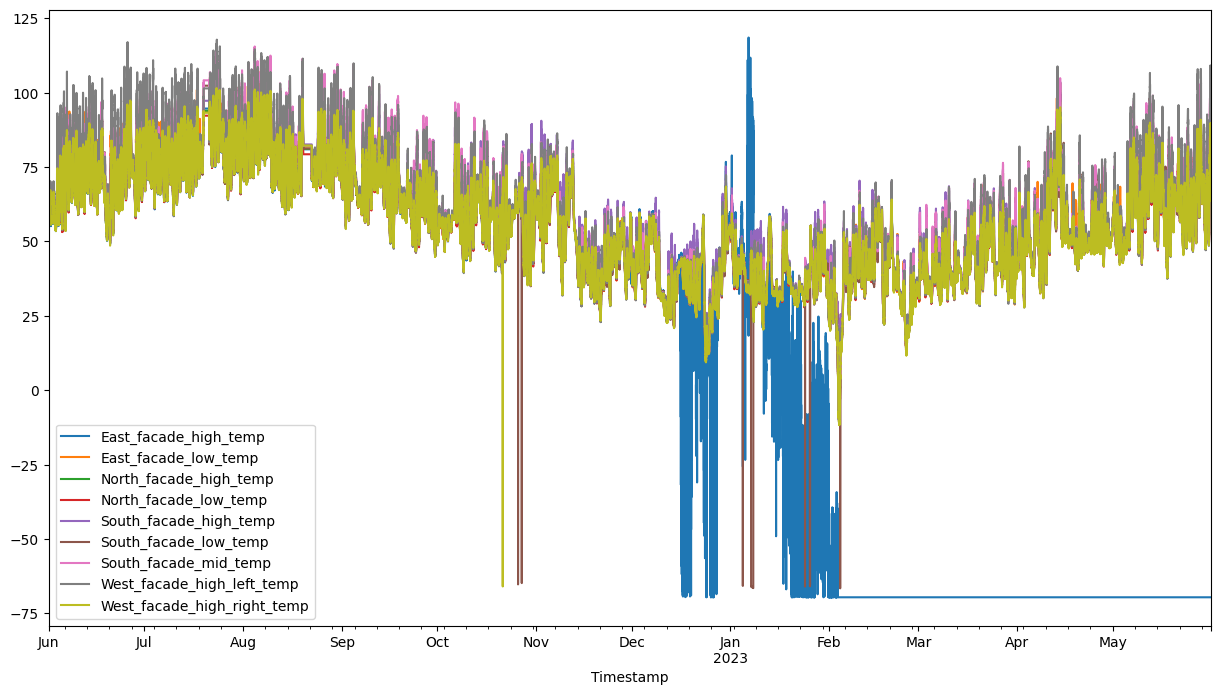

In [5]:
Zone_Temp.plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

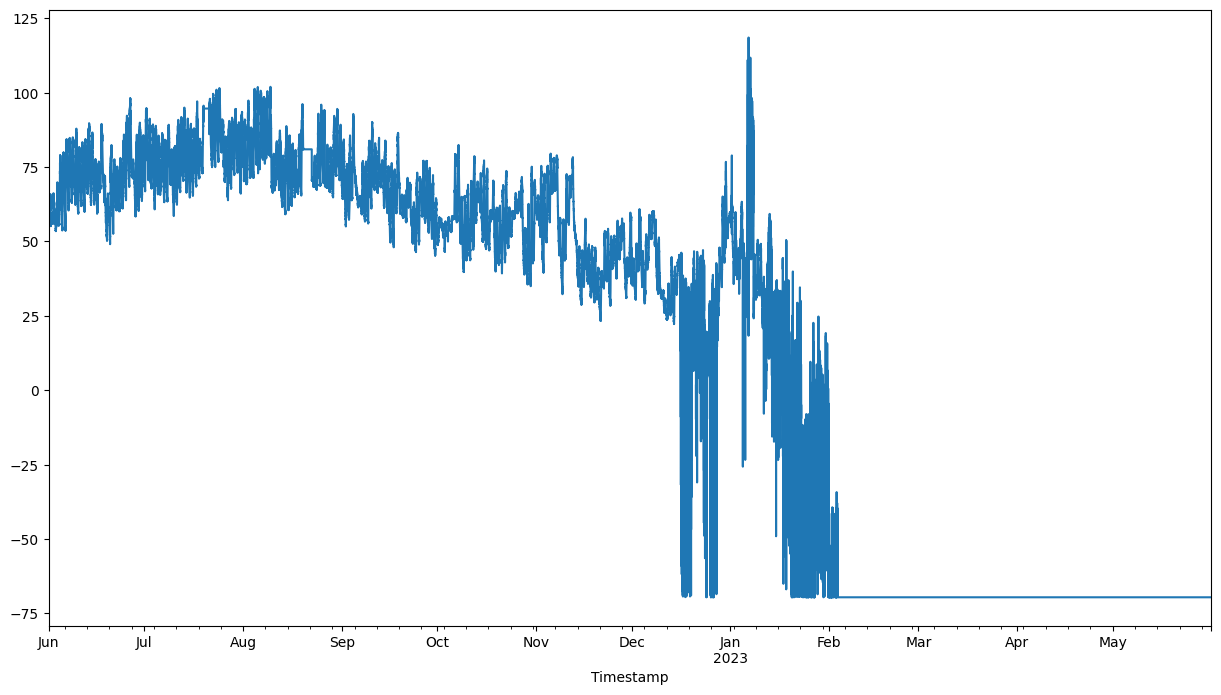

In [6]:
Zone_Temp['East_facade_high_temp'].plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

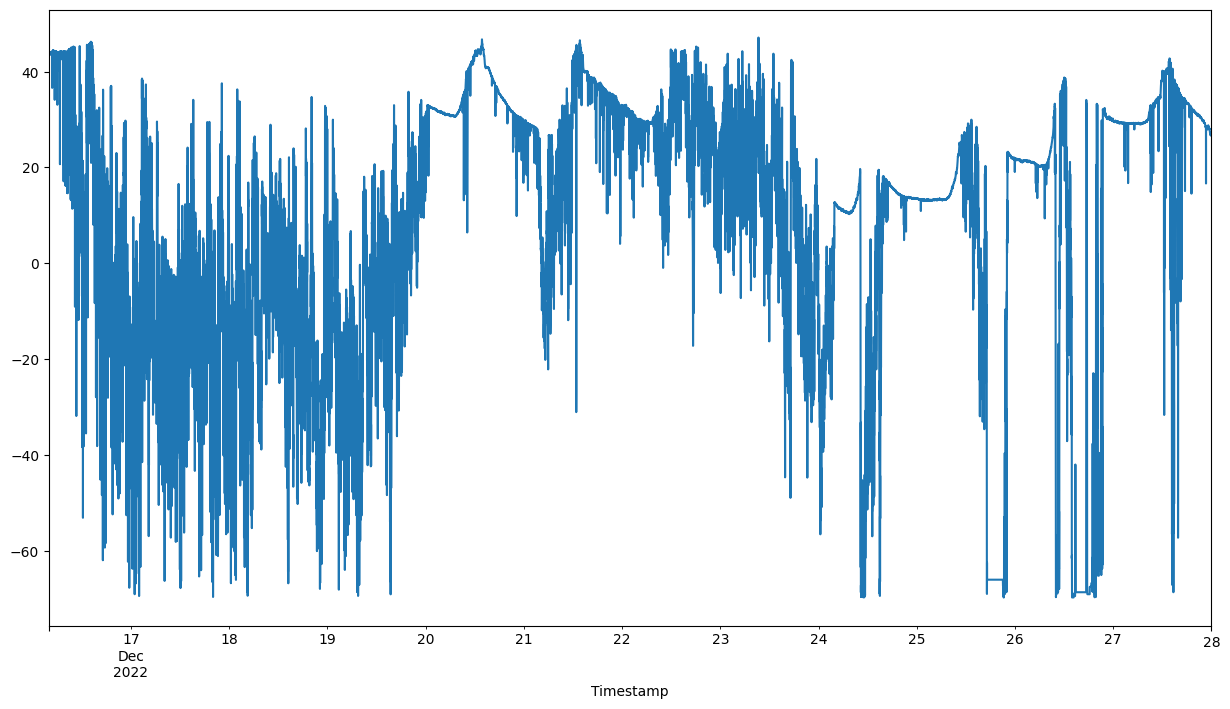

In [8]:
Zone_Temp['East_facade_high_temp']['2022-12-16 04:00:00':'2022-12-28 00:00:00'].plot(figsize=(15, 8))

In [9]:
Zone_Temp['East_facade_high_temp']['2022-12-16 04:00:00':] = np.nan

<Axes: xlabel='Timestamp'>

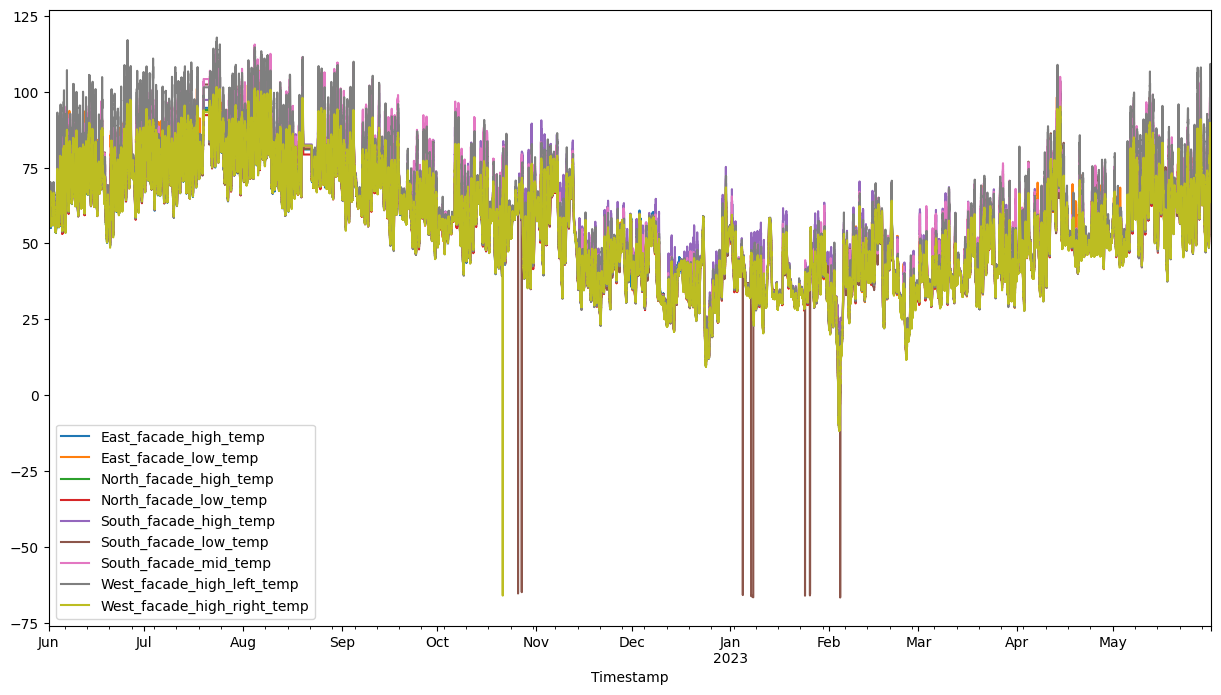

In [10]:
Zone_Temp.plot(figsize=(15, 8))

In [7]:
# # Zone_Temp[Zone_Temp > 1000] = np.nan
# Zone_Temp[Zone_Temp < 40] = np.nan

# Zone_Temp.plot(figsize=(15, 8))

In [11]:
#Difference Analysis
Lst_diff = []
Lst_name = []
#Loop through each DataFrame to calculate and store differences in data.
for i in range(0,len(Lst)):
    zone_name = Lst[i].columns.values[0]
    Lst_name.append(zone_name)
    Z = pd.to_numeric(Lst[i][zone_name])
    #Calculate the difference between consecutive data points.
    temp = Z.diff()
    #Store the differences, excluding the last one, and sorting to facilitate analysis (200 most significant differences).
    Lst_diff.append(temp.sort_values(ascending=True)[-200:-1].tolist())
    
# print (Lst_diff)
#Restructure the dataframe for visual analysis (rows to columns)
df = pd.DataFrame(Lst_diff).transpose()

df.columns = Lst_name
df   

East_facade_high_temp  East_facade_low_temp  North_facade_high_temp  \
0                34.867794              0.851410                0.673203   
1                34.927197              0.851425                0.673203   
2                34.946995              0.871185                0.673203   
3                34.966793              0.871185                0.673203   
4                34.986595              0.871185                0.673203   
..                     ...                   ...                     ...   
194              81.338390              2.870987                1.841393   
195              84.248985              3.029404                2.079002   
196              84.328186              4.118408                2.435410   
197              85.832989              4.157990                2.970001   
198              94.386593              4.276810                3.920395   

     North_facade_low_temp  South_facade_high_temp  South_facade_low_temp  \
0                 0.653397                1.188019               0.871201   
1                 0.653397                1.207787               0.871201   
2                 0.653397                1.207794               0.871201   
3                 0.653397                1.207794               0.871201   
4                 0.653397                1.207794               0.871201   
..                     ...                     ...                    ...   
194               1.583992                2.494812             105.197380   
195               1.623604                2.593803             105.929977   
196               1.682999                3.445206             109.553383   
197               1.920586                4.138199             125.710182   
198               2.158203                8.157608             135.035988   

     South_facade_mid_temp  West_facade_high_left_temp  \
0                 0.950401                    1.069199   
1                 0.950409                    1.069199   
2                 0.950409                    1.069199   
3                 0.950409                    1.069199   
4                 0.950409                    1.069199   
..                     ...                         ...   
194               2.673019                    2.593796   
195               3.861008                    2.732407   
196               4.395607                    3.405594   
197               8.375412                    3.821381   
198               8.573395                    7.959595   

     West_facade_high_right_temp  
0                       0.792007  
1                       0.792007  
2                       0.792007  
3                       0.792007  
4                       0.792007  
..                           ...  
194                     1.663200  
195                     1.663208  
196                     3.029388  
197                     3.069000  
198                   128.957375  

[199 rows x 9 columns]

<Axes: >

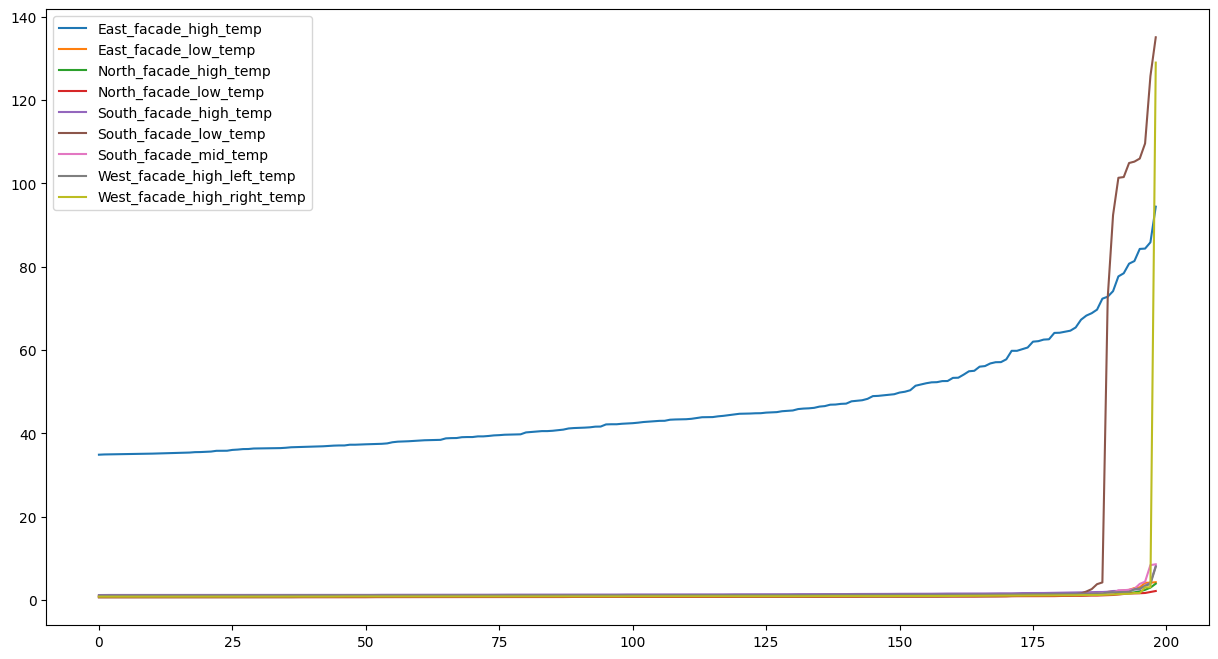

In [12]:
df.plot(figsize=(15, 8))

In [13]:
#Observe the .9 quantile (where 90% of the differences lie in)
df.quantile(0.9)

East_facade_high_temp          62.872910
East_facade_low_temp            1.350340
North_facade_high_temp          1.025641
North_facade_low_temp           0.930603
South_facade_high_temp          1.702797
South_facade_low_temp           1.290962
South_facade_mid_temp           1.294928
West_facade_high_left_temp      1.449350
West_facade_high_right_temp     1.088998
Name: 0.9, dtype: float64

In [14]:
df.quantile(0.9).mean()

8.11183666653102

In [15]:
#Observe the current statistical summary of the data
df.describe()

East_facade_high_temp  East_facade_low_temp  North_facade_high_temp  \
count             199.000000            199.000000              199.000000   
mean               45.963056              1.087805                0.858763   
std                11.870973              0.494771                0.354199   
min                34.867794              0.851410                0.673203   
25%                37.342796              0.891006                0.712799   
50%                42.352192              0.950386                0.772202   
75%                49.331692              1.049408                0.841503   
max                94.386593              4.276810                3.920395   

       North_facade_low_temp  South_facade_high_temp  South_facade_low_temp  \
count             199.000000              199.000000             199.000000   
mean                0.794240                1.455449               6.287345   
std                 0.210949                0.586105              23.143203   
min                 0.653397                1.188019               0.871201   
25%                 0.673218                1.227612               0.910797   
50%                 0.732605                1.326591               0.970200   
75%                 0.811813                1.475098               1.098900   
max                 2.158203                8.157608             135.035988   

       South_facade_mid_temp  West_facade_high_left_temp  \
count             199.000000                  199.000000   
mean                1.208596                    1.280731   
std                 0.828967                    0.572731   
min                 0.950401                    1.069199   
25%                 0.990002                    1.108810   
50%                 1.049393                    1.168198   
75%                 1.128601                    1.267197   
max                 8.573395                    7.959595   

       West_facade_high_right_temp  
count                   199.000000  
mean                      1.573652  
std                       9.079245  
min                       0.792007  
25%                       0.831589  
50%                       0.871185  
75%                       0.940498  
max                     128.957375

In [16]:
#Observe the .8 quantile (where 80% of the differences lie in)
q_values = df.quantile(0.8)

In [17]:
q_values

East_facade_high_temp          52.537312
East_facade_low_temp            1.069214
North_facade_high_temp          0.879117
North_facade_low_temp           0.831599
South_facade_high_temp          1.532529
South_facade_low_temp           1.128601
South_facade_mid_temp           1.168198
West_facade_high_left_temp      1.275122
West_facade_high_right_temp     0.970200
Name: 0.8, dtype: float64

In [18]:
# Update 'Lst_name' to contain the names of columns
Lst_name = Zone_Temp.columns.values

In [19]:
#If the absolute difference between consecutive values is greater than 10, drop them.
for i in range(0,len(Lst_name)):
    df = Zone_Temp[Lst_name[i]]
#     print (df.diff(), q_values[i])
    print (df[abs(df.diff())> 10].index)
    Zone_Temp[Lst_name[i]] = df.drop(df[abs(df.diff())> 10].index)

DatetimeIndex(['2022-11-30 21:50:00-05:00', '2022-11-30 21:51:00-05:00'], dtype='datetime64[ns, US/Eastern]', name='Timestamp', freq=None)
DatetimeIndex([], dtype='datetime64[ns, US/Eastern]', name='Timestamp', freq=None)
DatetimeIndex([], dtype='datetime64[ns, US/Eastern]', name='Timestamp', freq=None)
DatetimeIndex([], dtype='datetime64[ns, US/Eastern]', name='Timestamp', freq=None)
DatetimeIndex(['2022-07-21 08:50:00-04:00'], dtype='datetime64[ns, US/Eastern]', name='Timestamp', freq=None)
DatetimeIndex(['2022-07-21 08:50:00-04:00', '2022-10-26 07:36:00-04:00',
               '2022-10-26 07:40:00-04:00', '2022-10-27 11:30:00-04:00',
               '2022-10-27 11:41:00-04:00', '2023-01-04 21:24:00-05:00',
               '2023-01-04 21:28:00-05:00', '2023-01-07 10:53:00-05:00',
               '2023-01-08 04:20:00-05:00', '2023-01-24 10:04:00-05:00',
               '2023-01-24 10:07:00-05:00', '2023-01-24 10:38:00-05:00',
               '2023-01-24 10:40:00-05:00', '2023-01-25 22:45:00

<Axes: xlabel='Timestamp'>

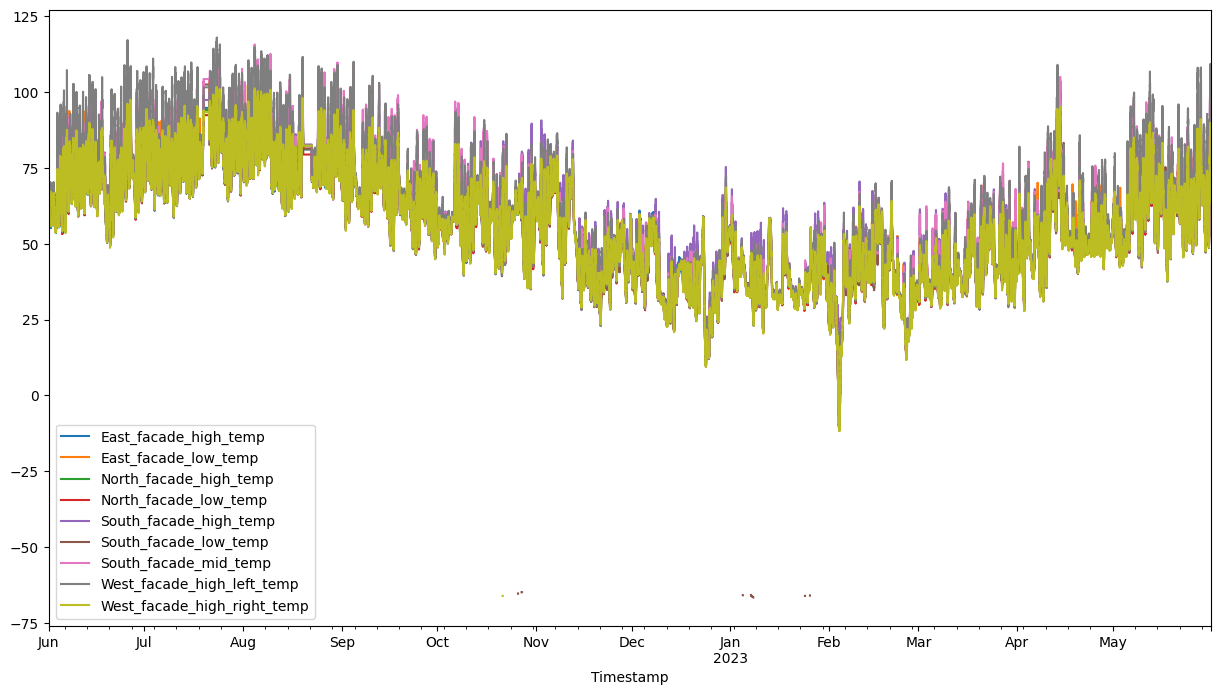

In [20]:
Zone_Temp.plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

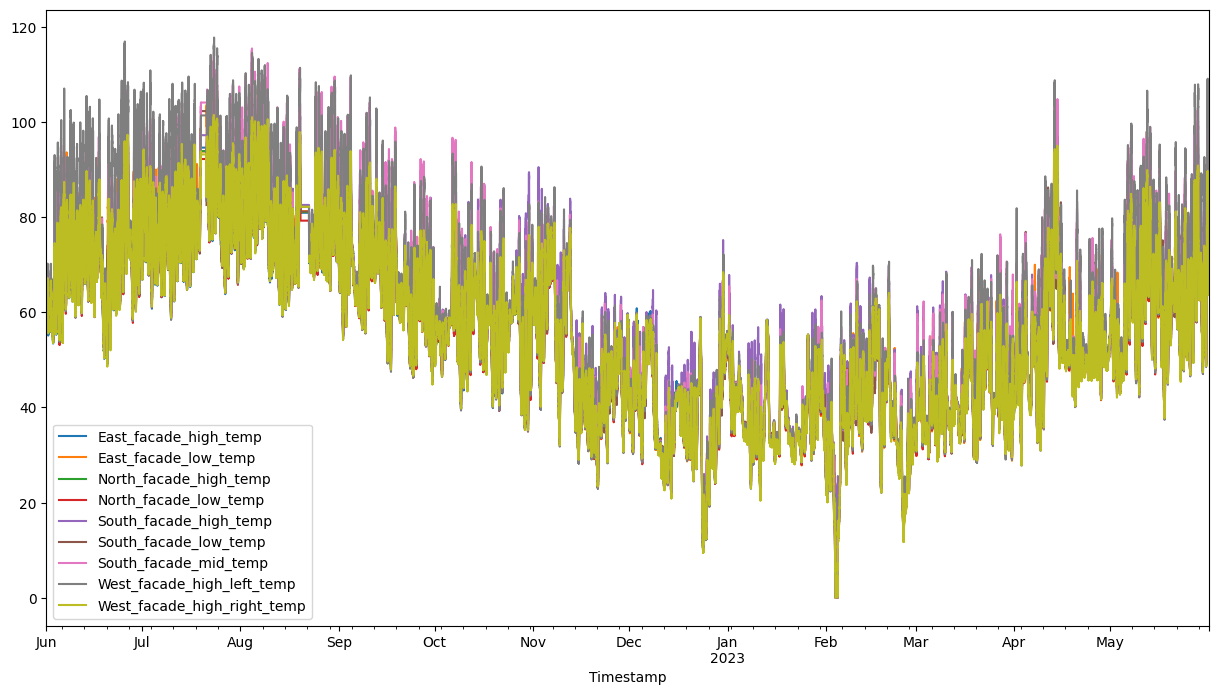

In [21]:
Zone_Temp[Zone_Temp < 0] = np.nan
Zone_Temp.plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

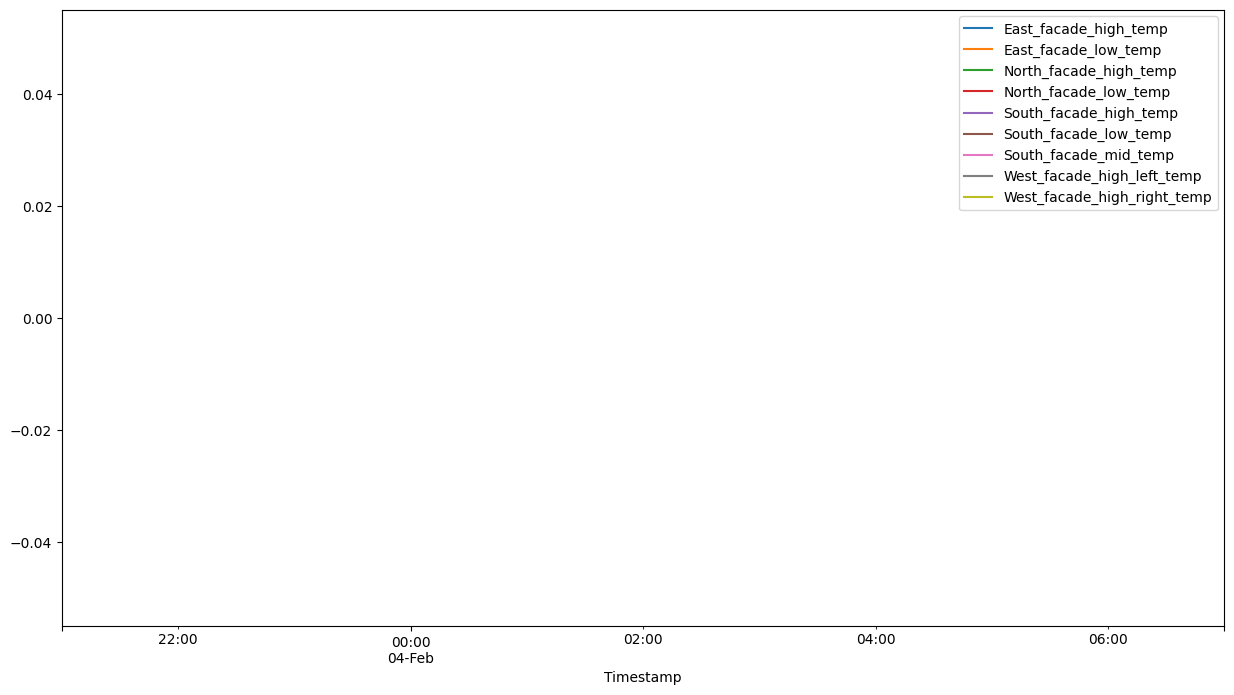

In [28]:
Zone_Temp['2023-02-03 21:00:00':'2023-02-04 07:00:00'].plot(figsize=(15, 8))

In [29]:
Zone_Temp['2023-02-03 21:00:00':'2023-02-04 07:00:00'] = np.nan

<Axes: xlabel='Timestamp'>

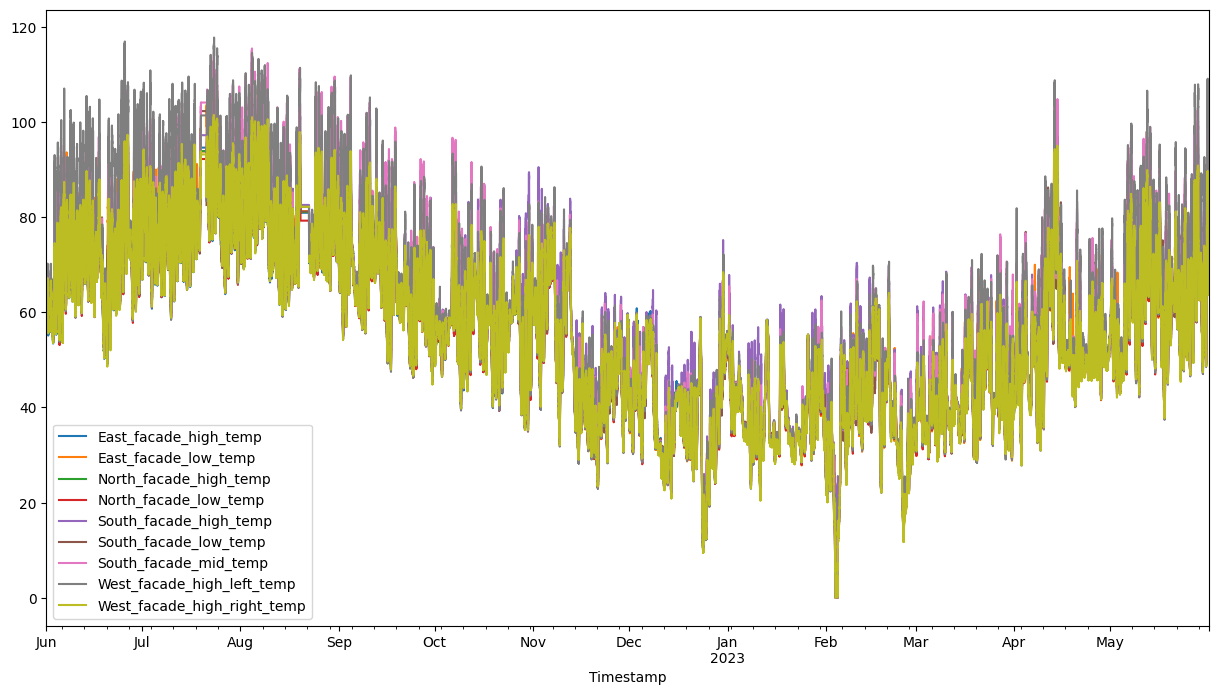

In [30]:
Zone_Temp.plot(figsize=(15, 8))

C:\Users\Sang\AppData\Local\Temp\ipykernel_26680\589575710.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Zone_Temp = Zone_Temp.resample("H").mean().ffill()


<Axes: xlabel='Timestamp'>

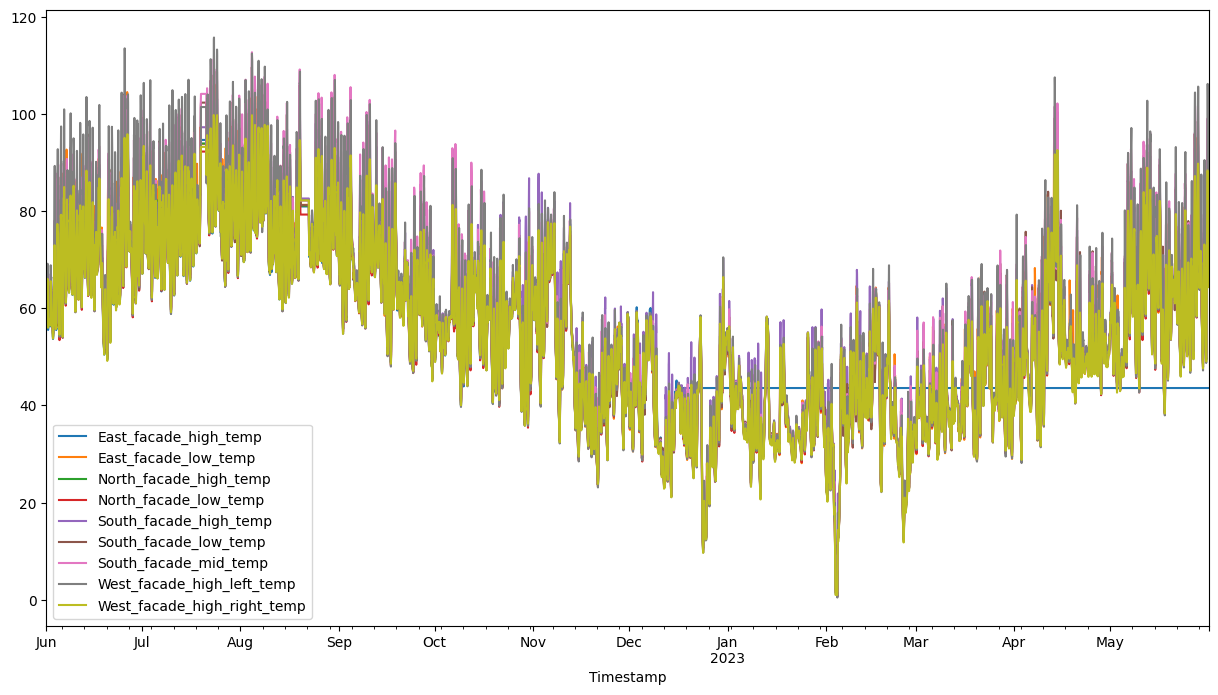

In [31]:
#Process to Hourly and forward fill (average to hour and forward fill to assign last existing value to a missing value)
Zone_Temp = Zone_Temp.resample("H").mean().ffill()

Zone_Temp.plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

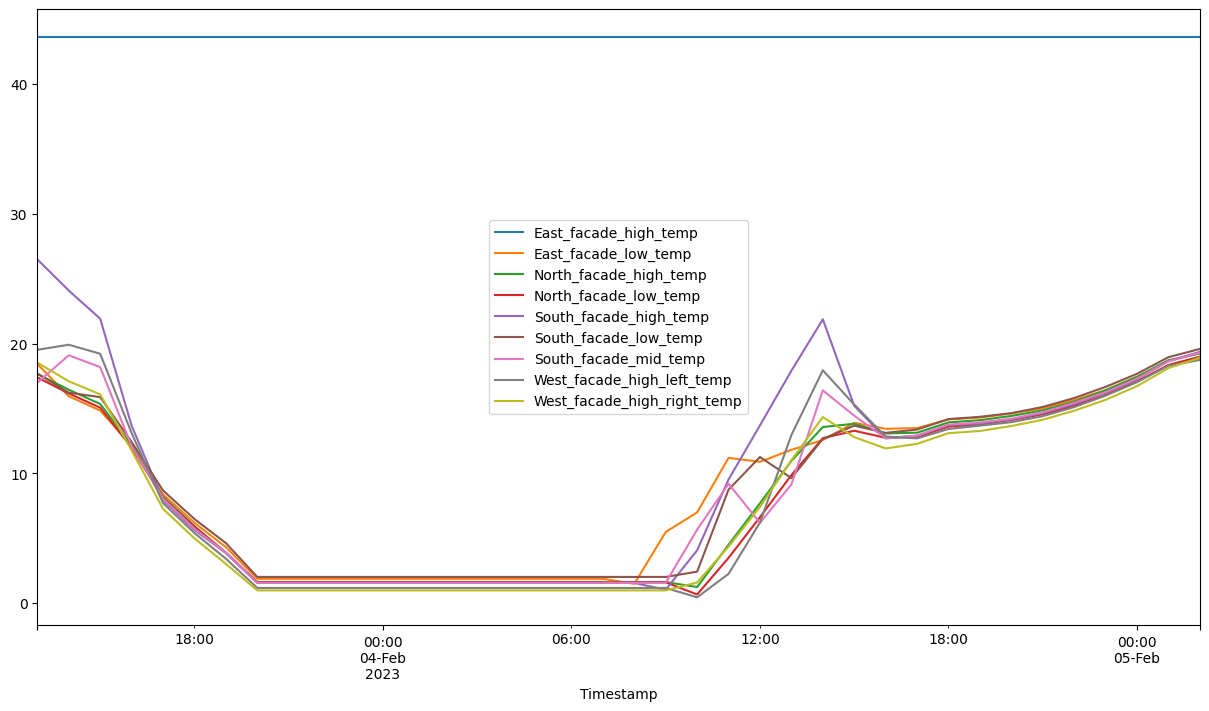

In [32]:
Zone_Temp['2023-02-03 13:00:00':'2023-02-05 02:00:00'].plot(figsize=(15, 8))

In [33]:
#Missing data check
# Detecting rows with repeated values
repeated_index = (Zone_Temp.diff() == 0).all(axis=1)
repeated_rows = Zone_Temp[repeated_index]

# Now let's get the index of the repeated rows
repeated_rows_index = repeated_rows.index.tolist()

Zone_Temp[repeated_index] = np.nan

<Axes: xlabel='Timestamp'>

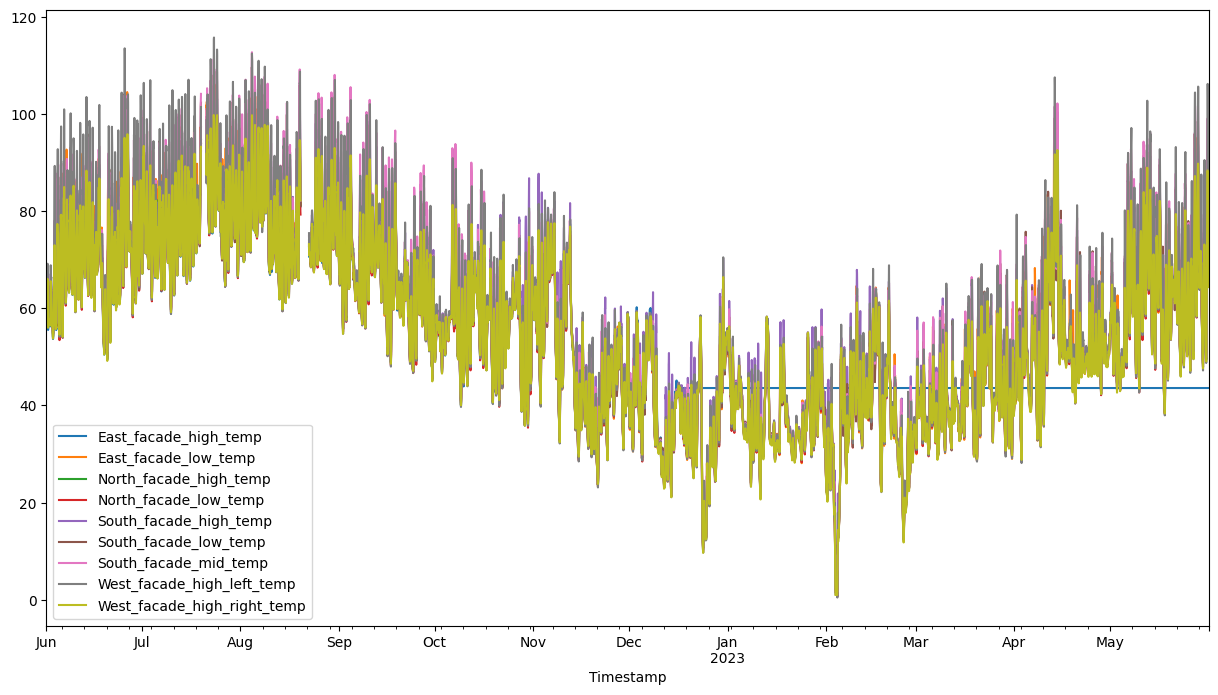

In [34]:
Zone_Temp.plot(figsize=(15, 8))

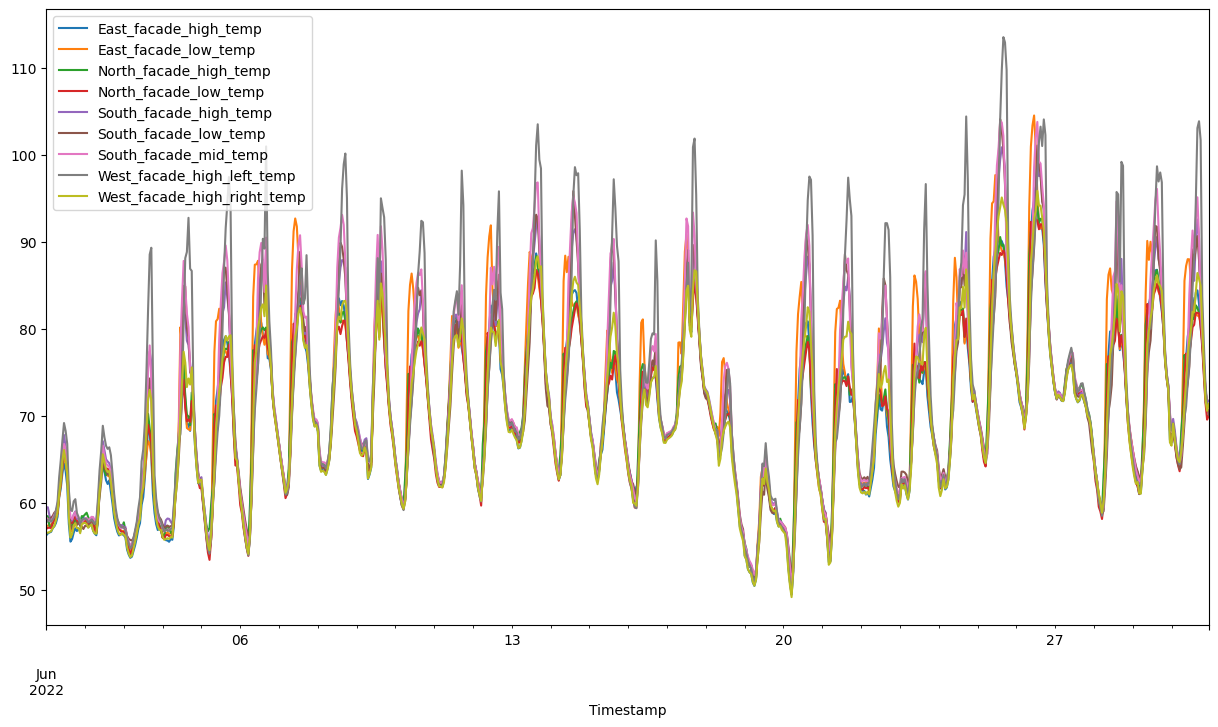

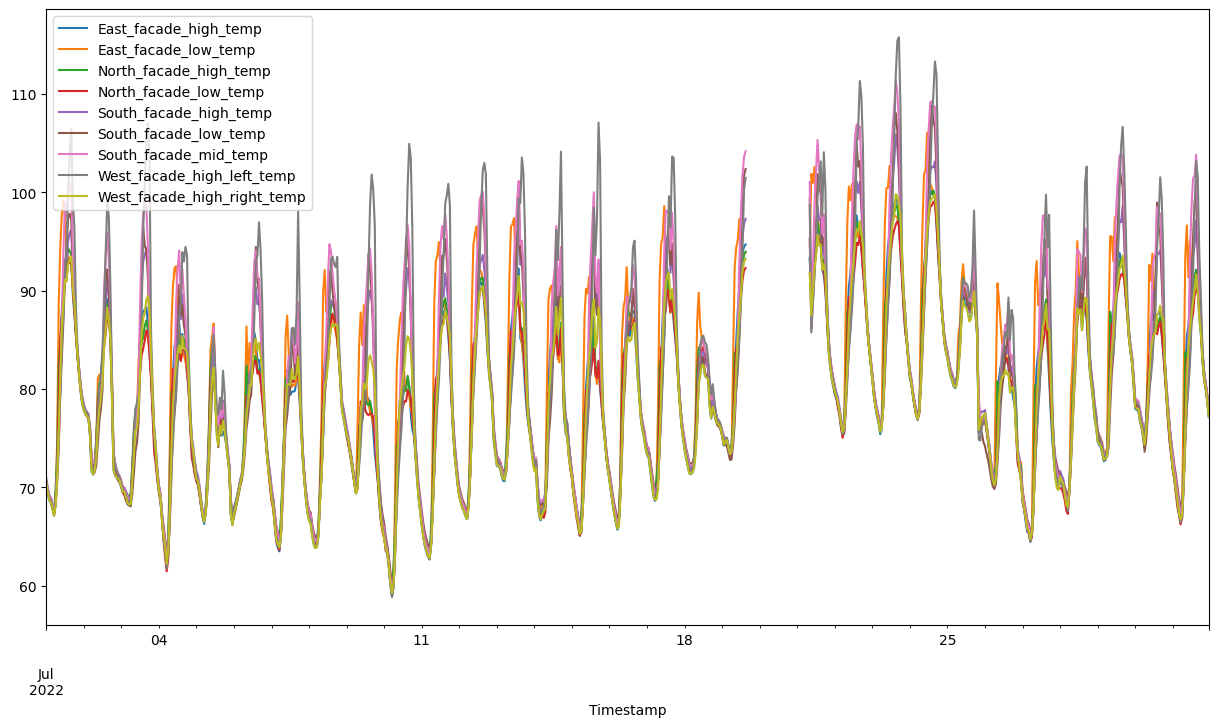

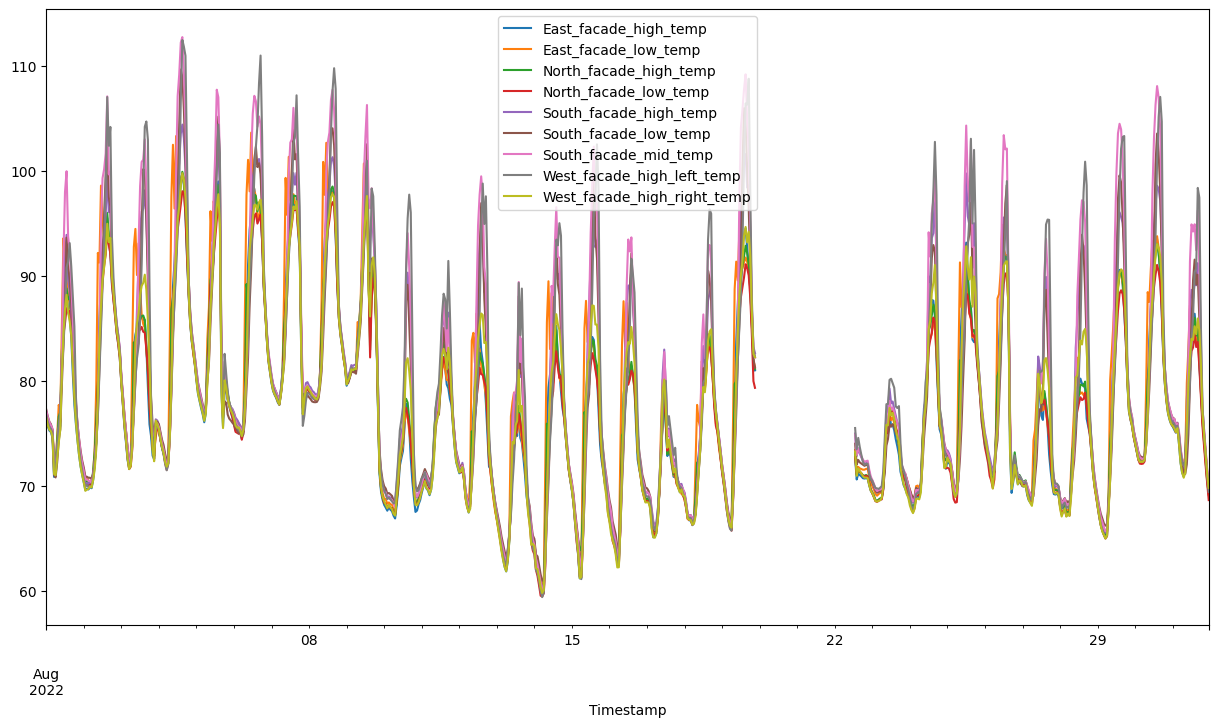

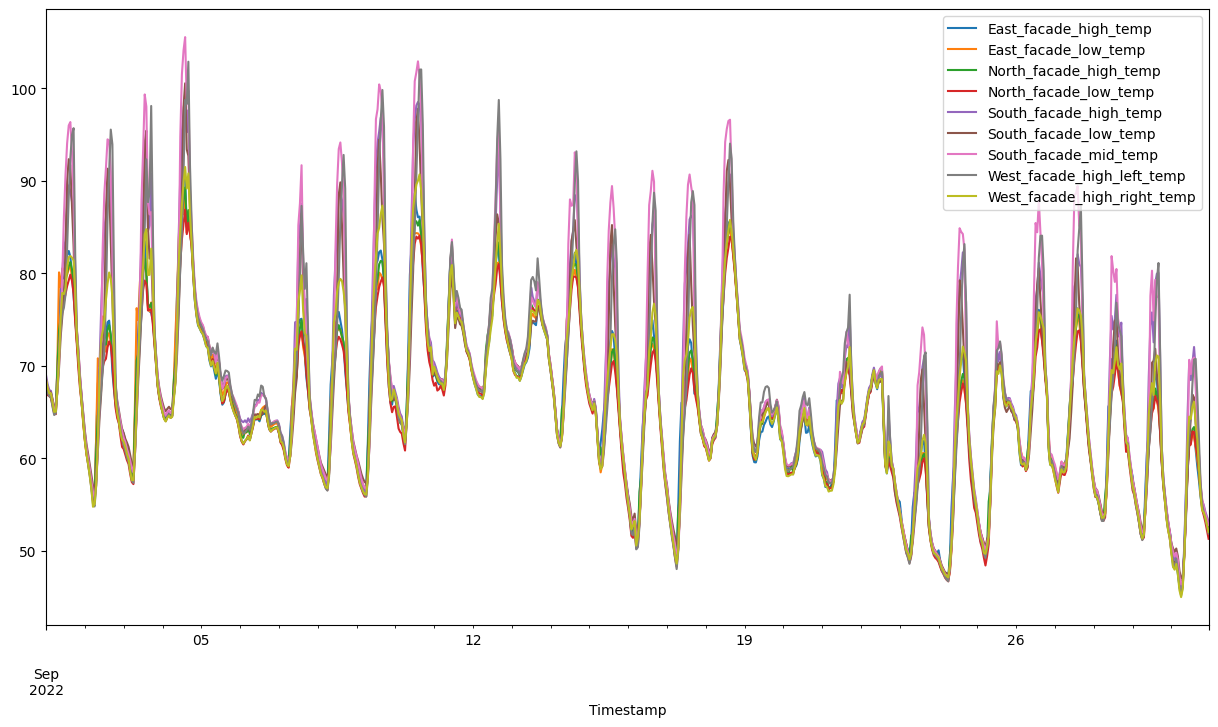

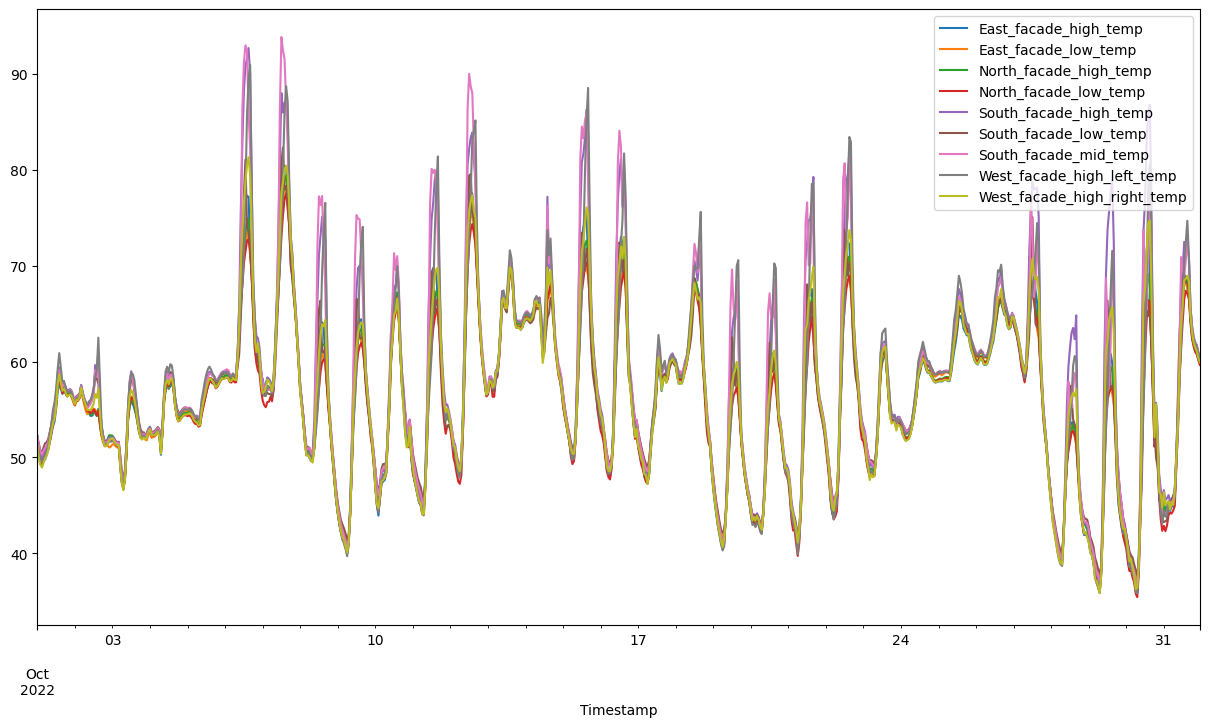

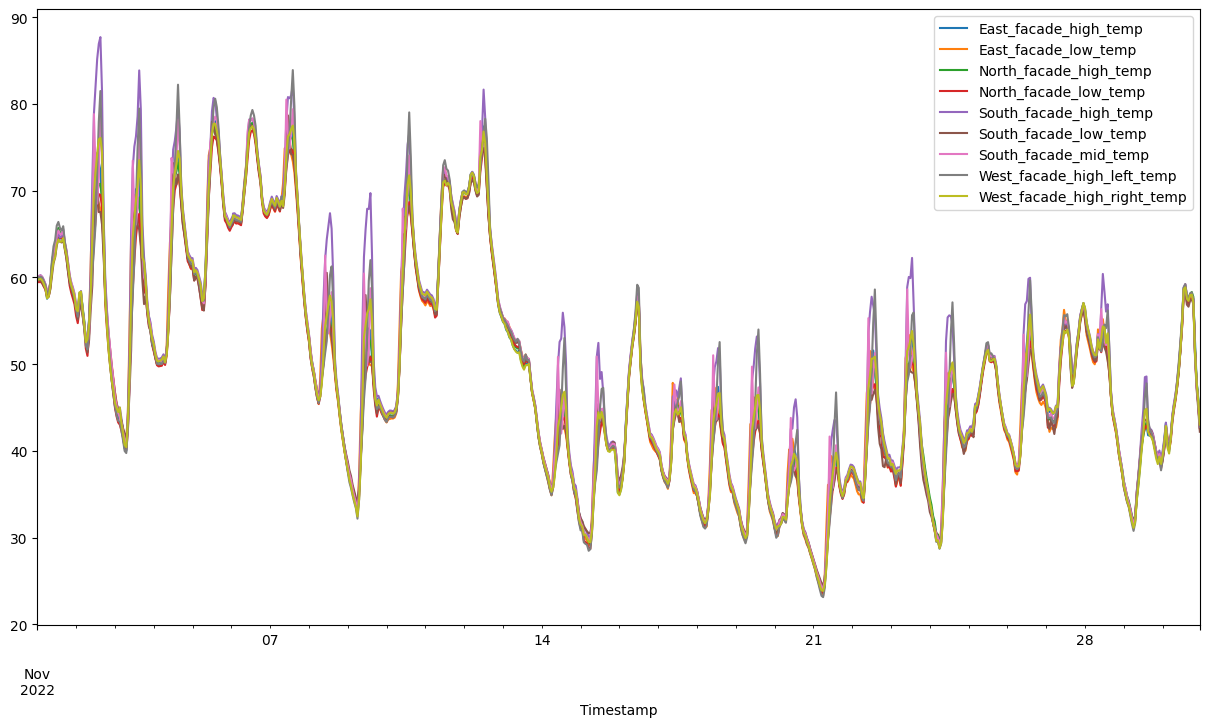

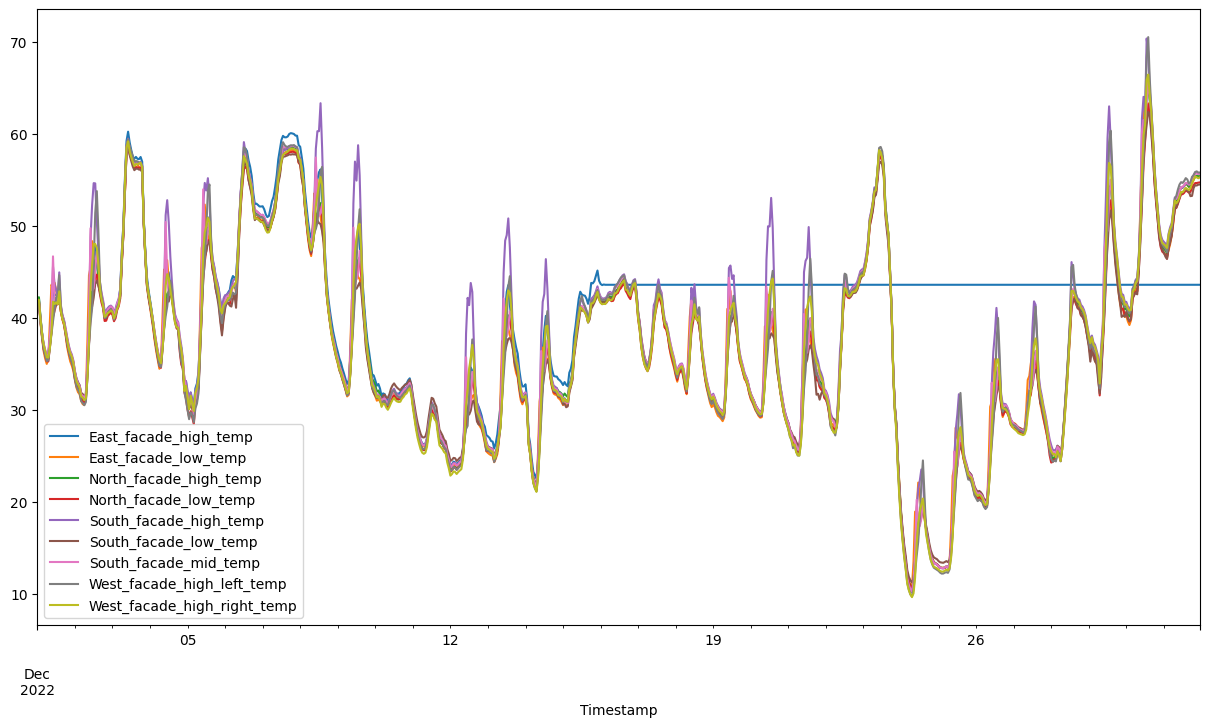

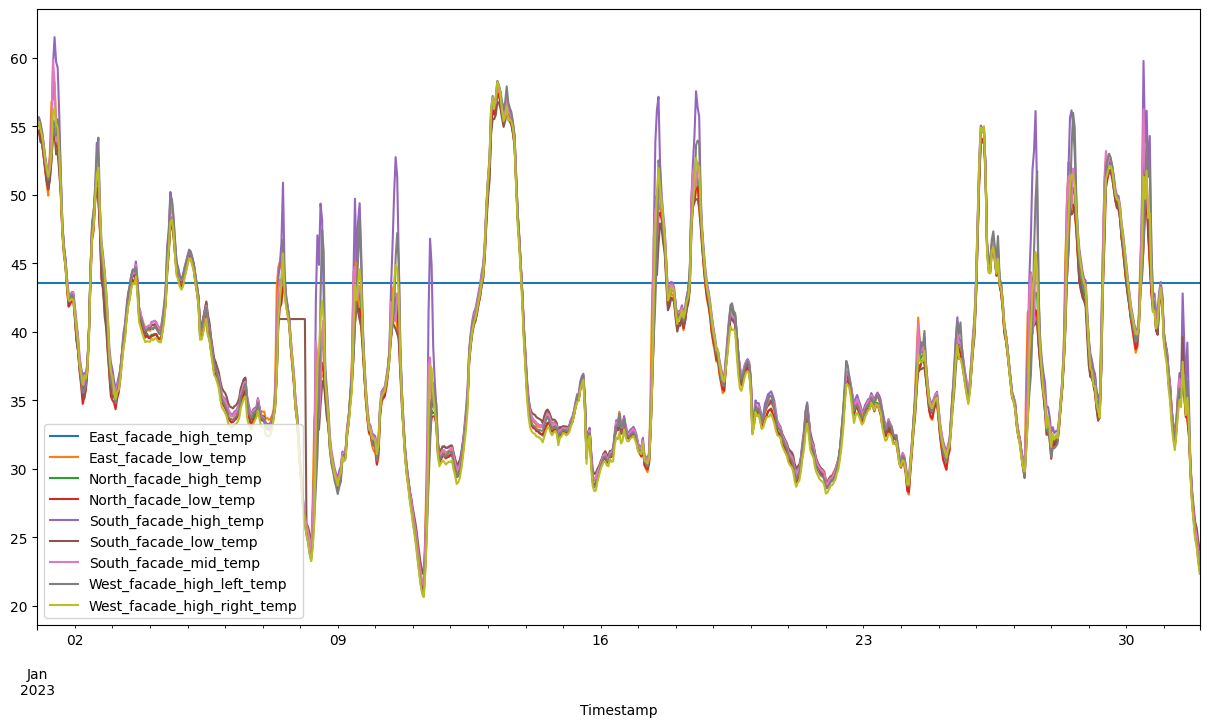

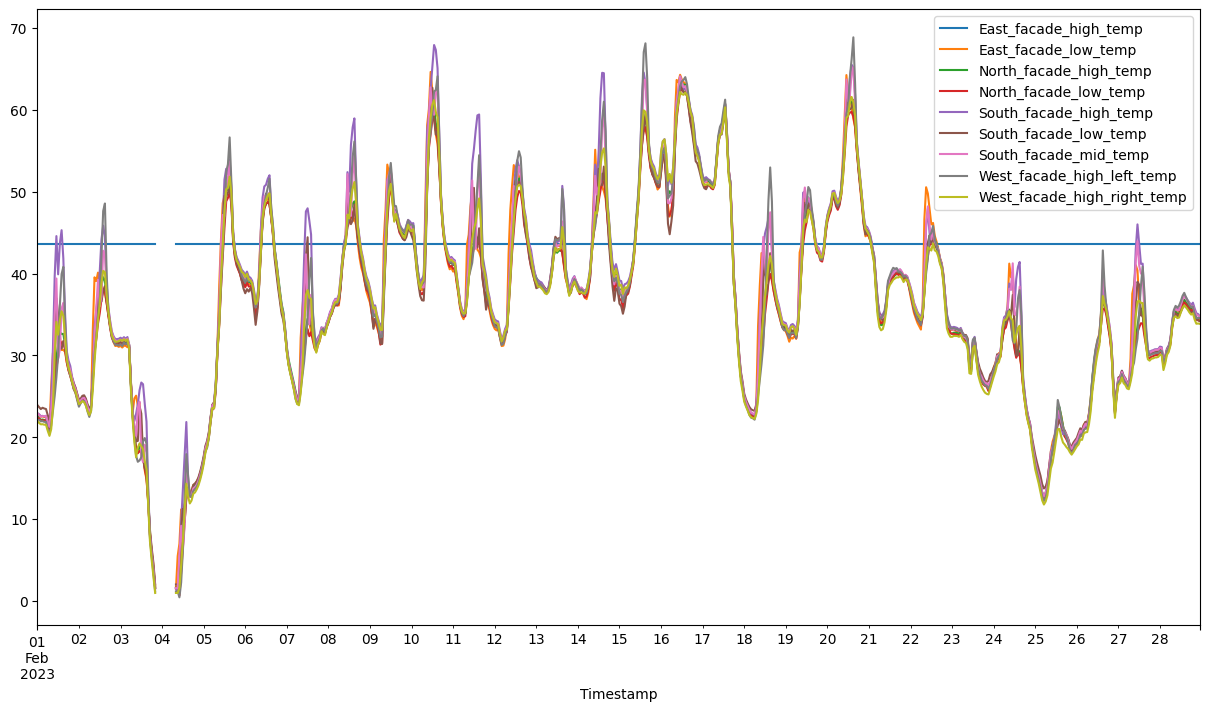

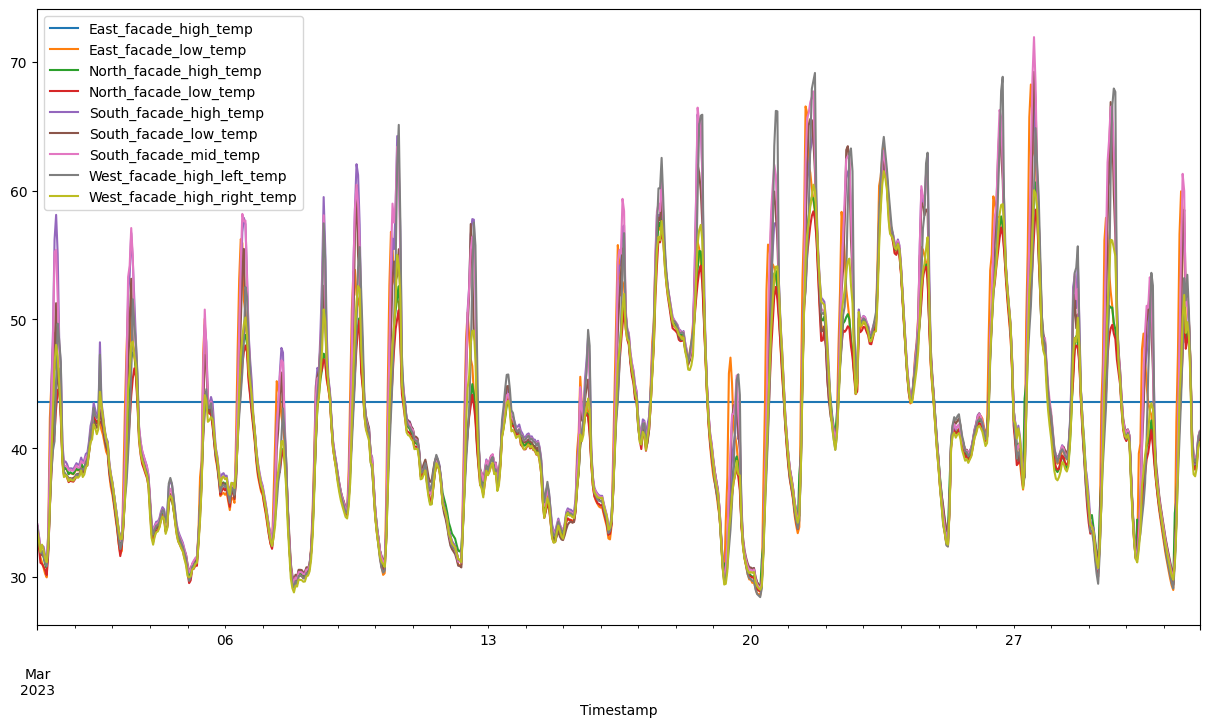

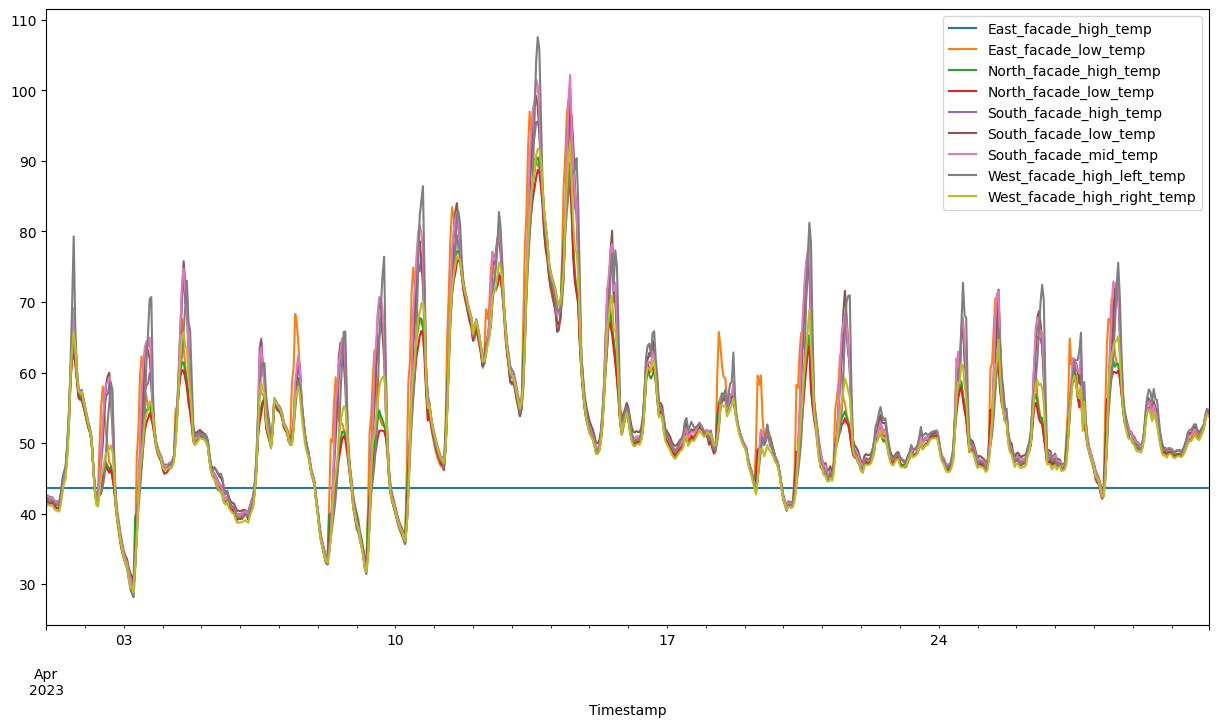

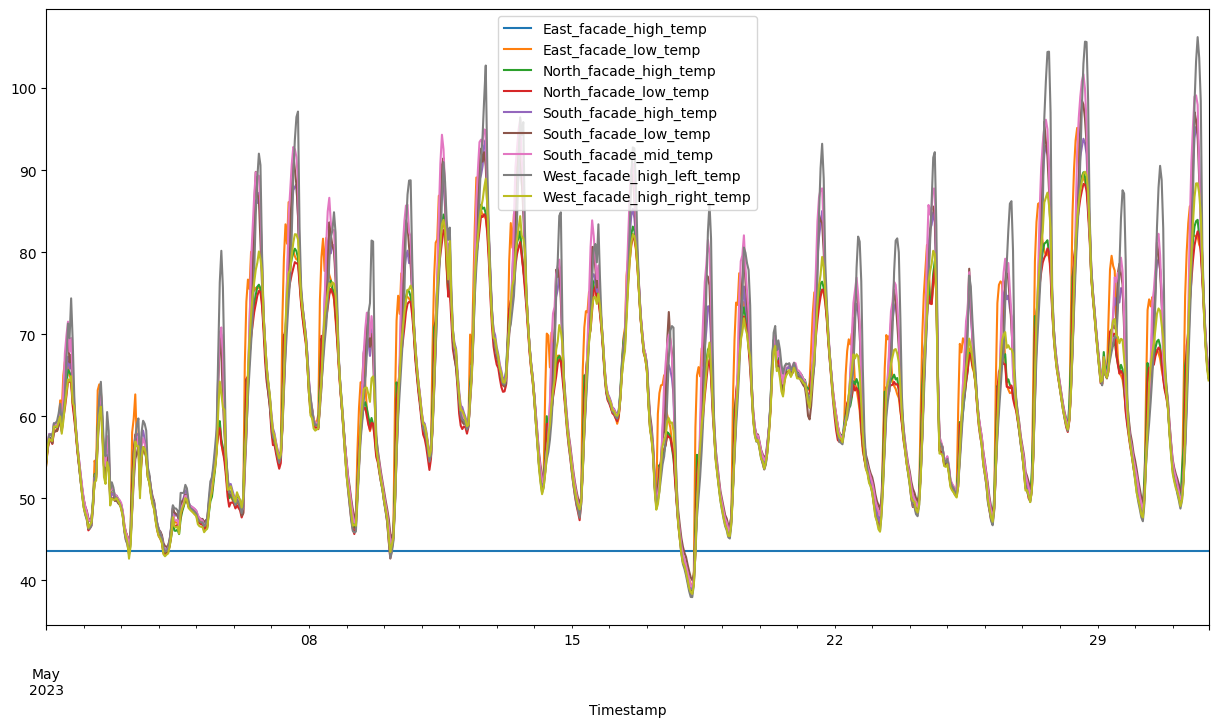

In [35]:
# Then, group by year and week number and apply Mahalanobis distance function
for (year, month), group in Zone_Temp.groupby([Zone_Temp.index.year, Zone_Temp.index.month]):

    group.plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

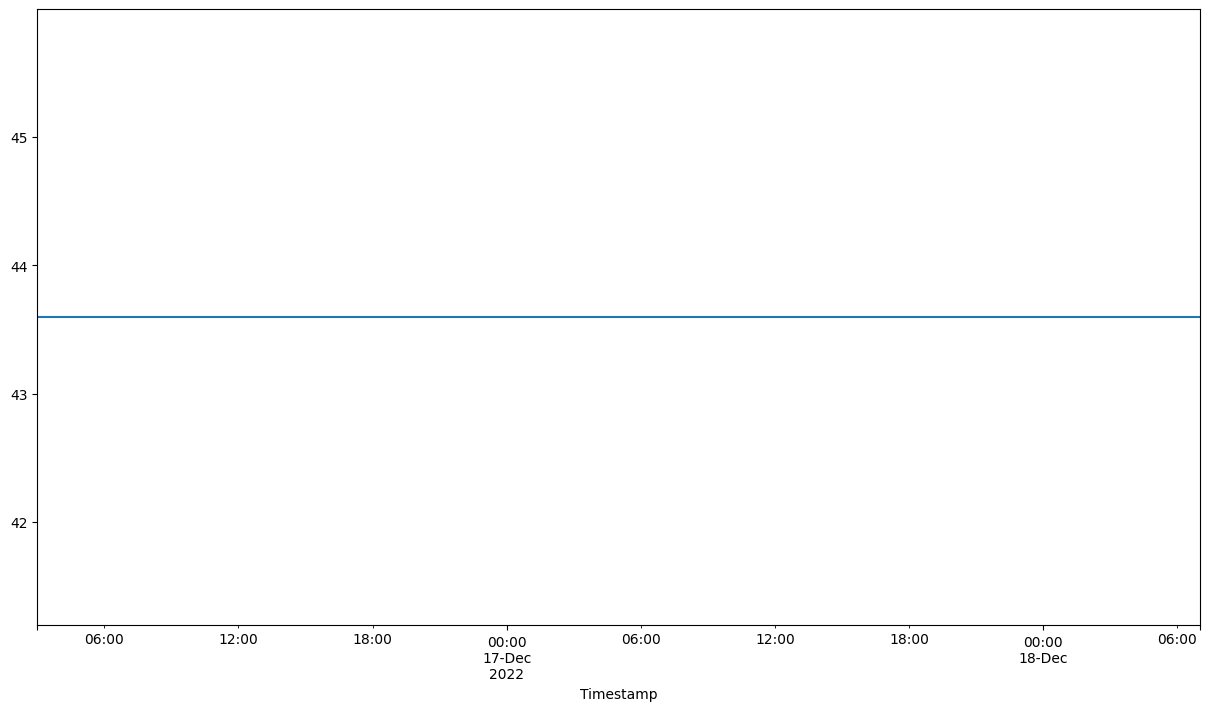

In [41]:
Zone_Temp['East_facade_high_temp']['2022-12-16 03:00:00':'2022-12-18 07:00:00'].plot(figsize=(15, 8))

In [42]:
Zone_Temp['East_facade_high_temp']['2022-12-16 03:00:00':] = np.nan

C:\Users\Sang\AppData\Local\Temp\ipykernel_26680\3872633344.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Zone_Temp['East_facade_high_temp']['2022-12-16 03:00:00':] = np.nan


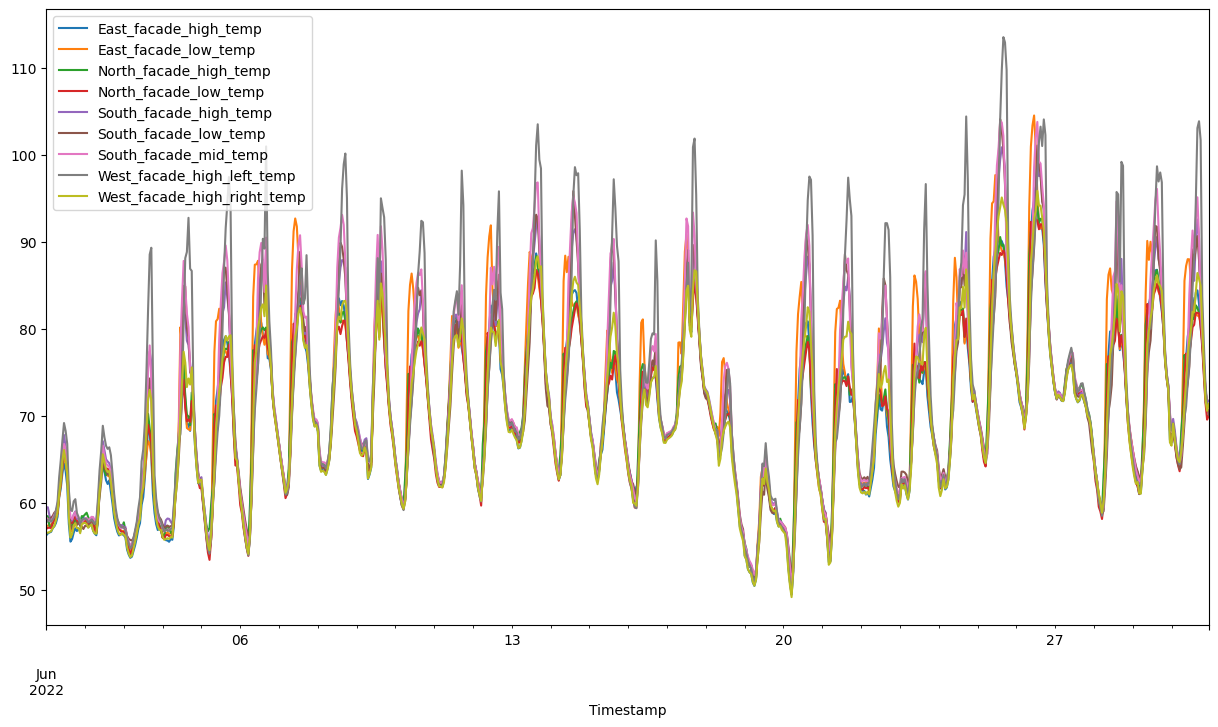

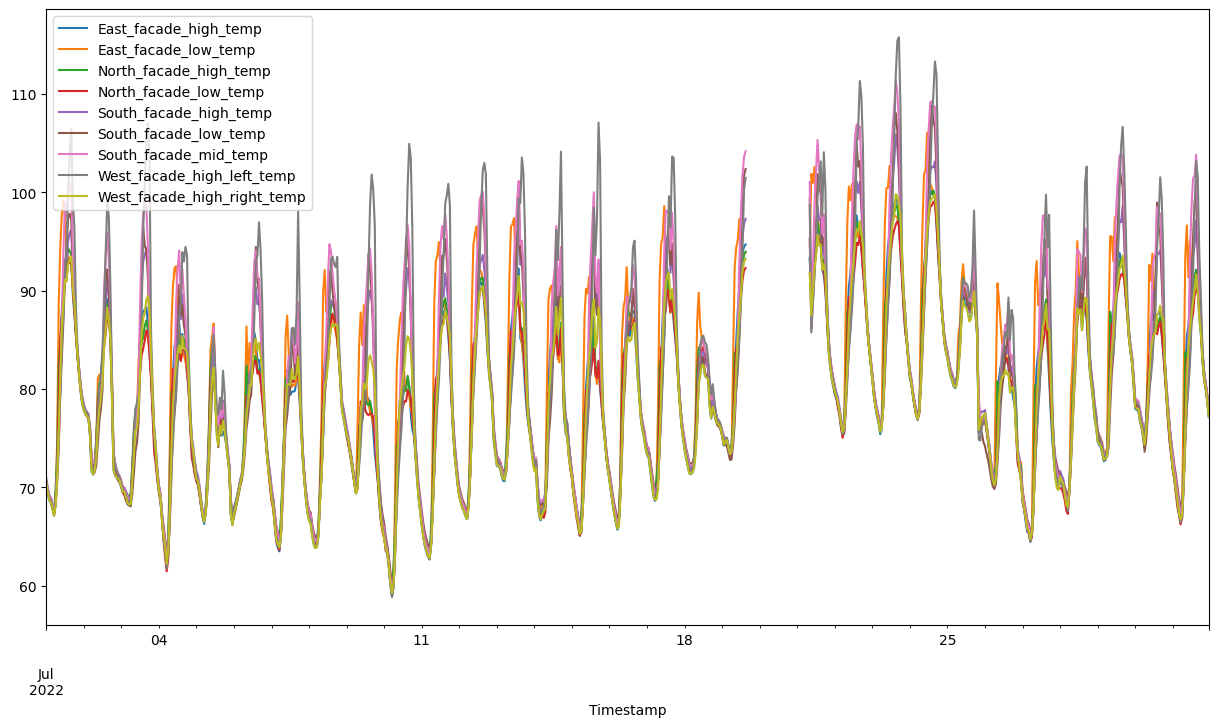

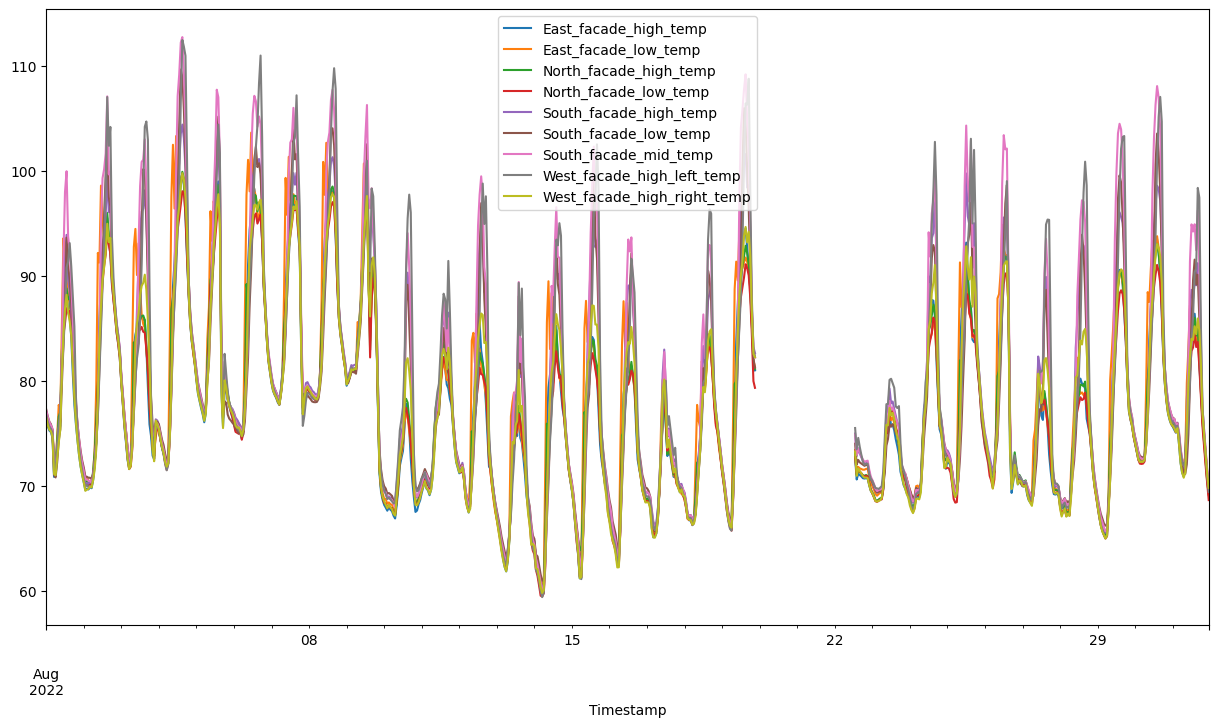

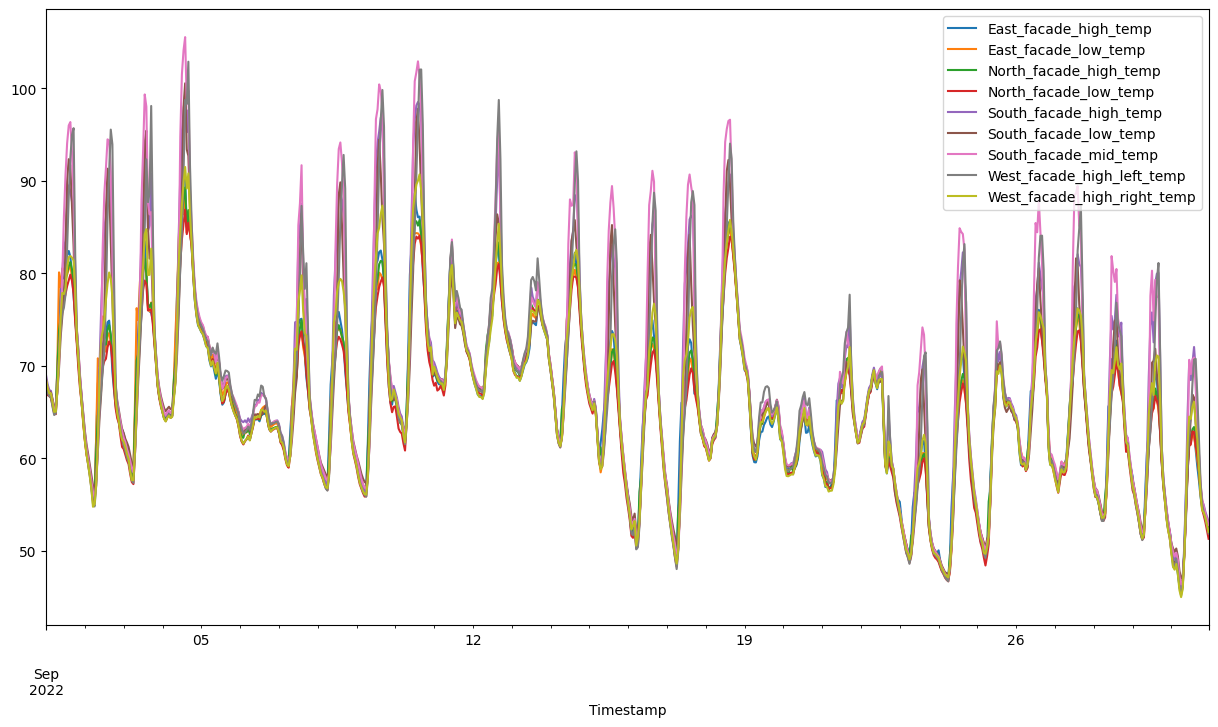

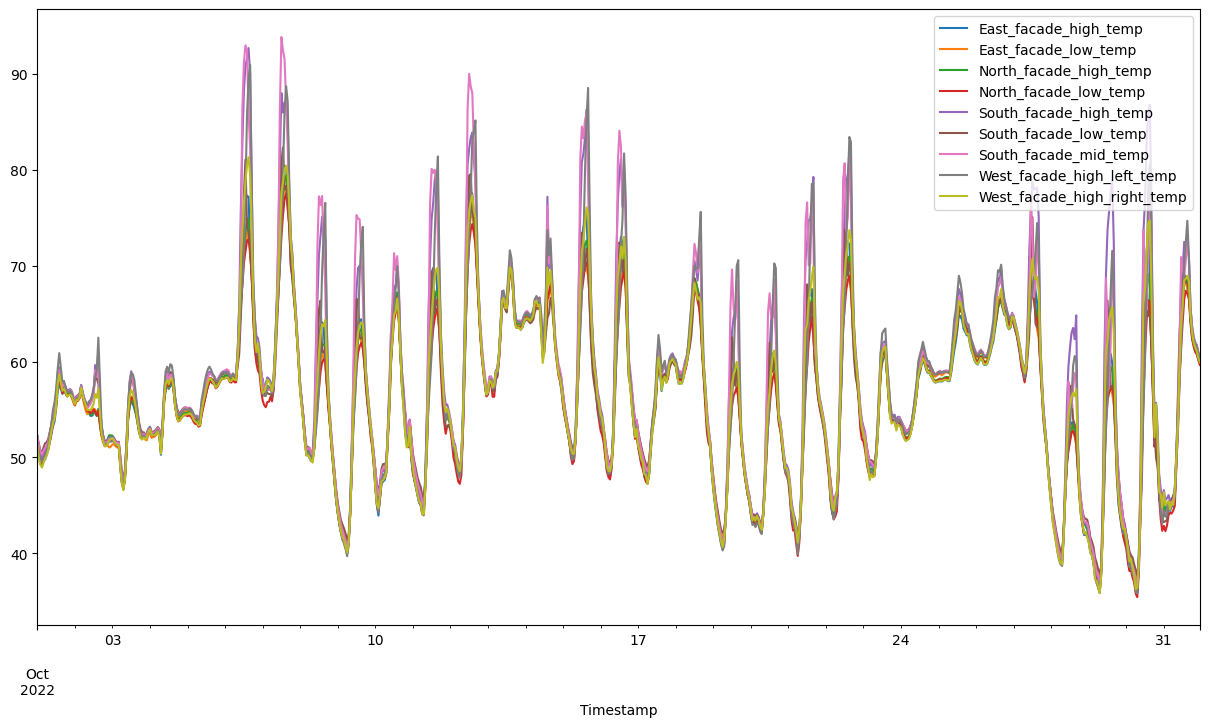

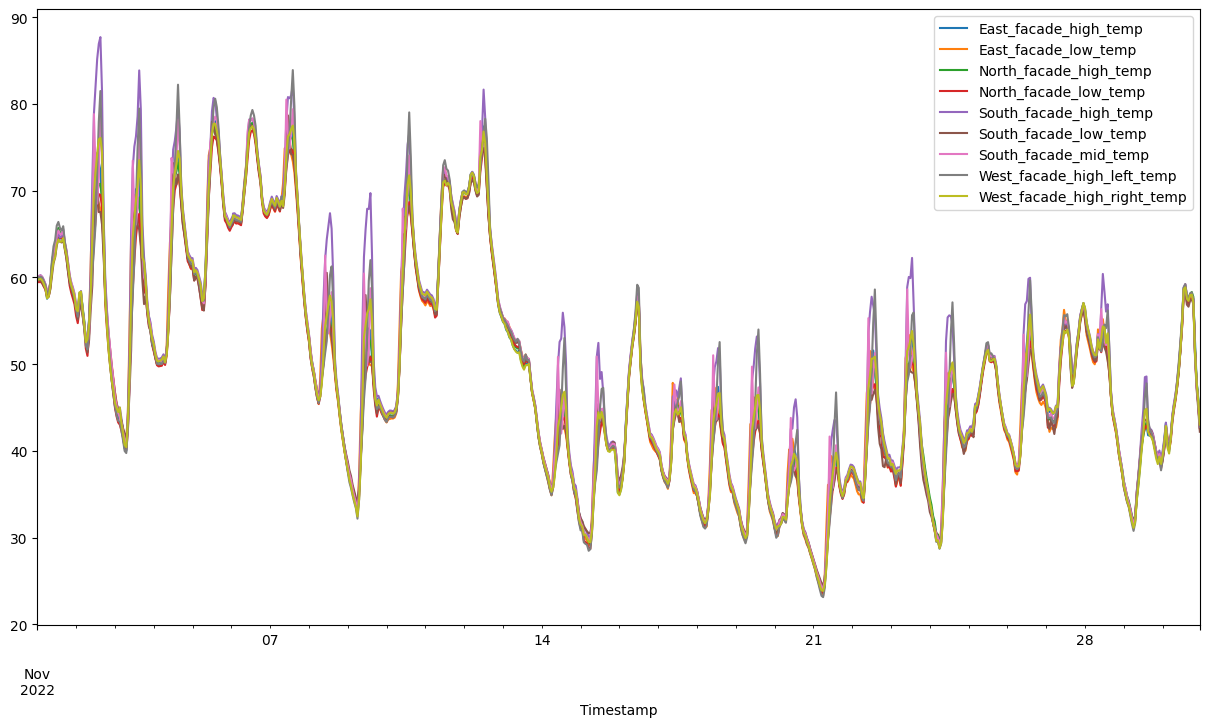

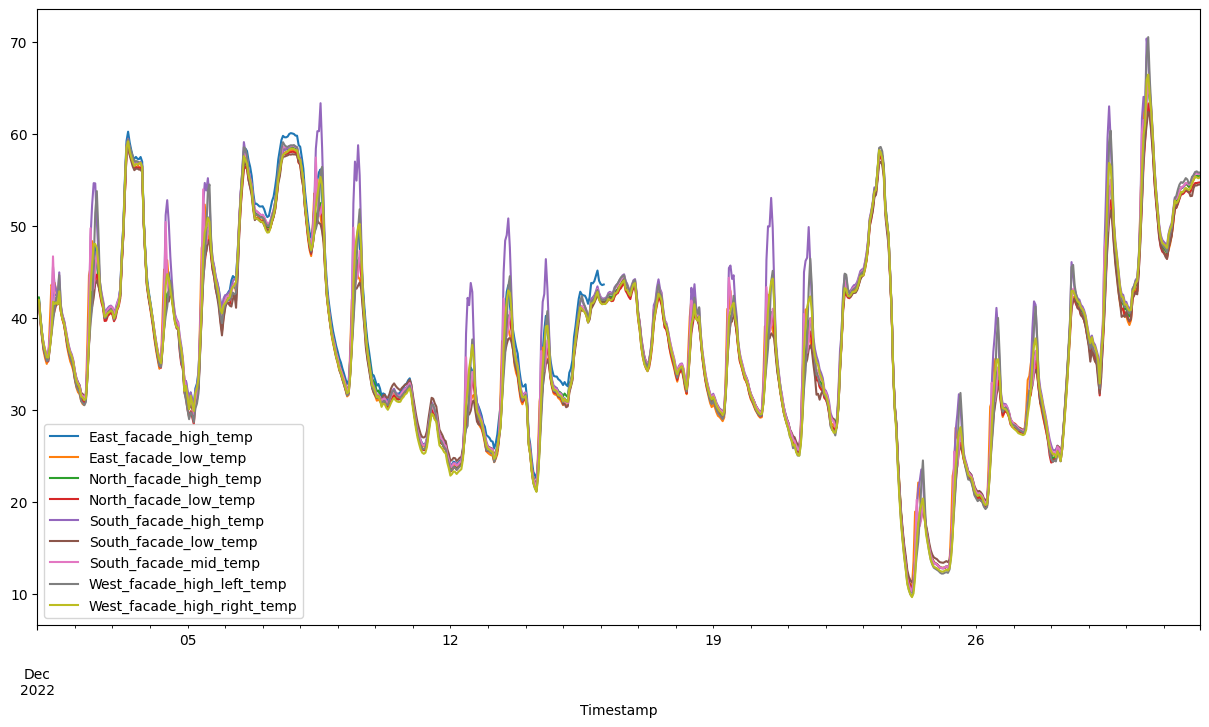

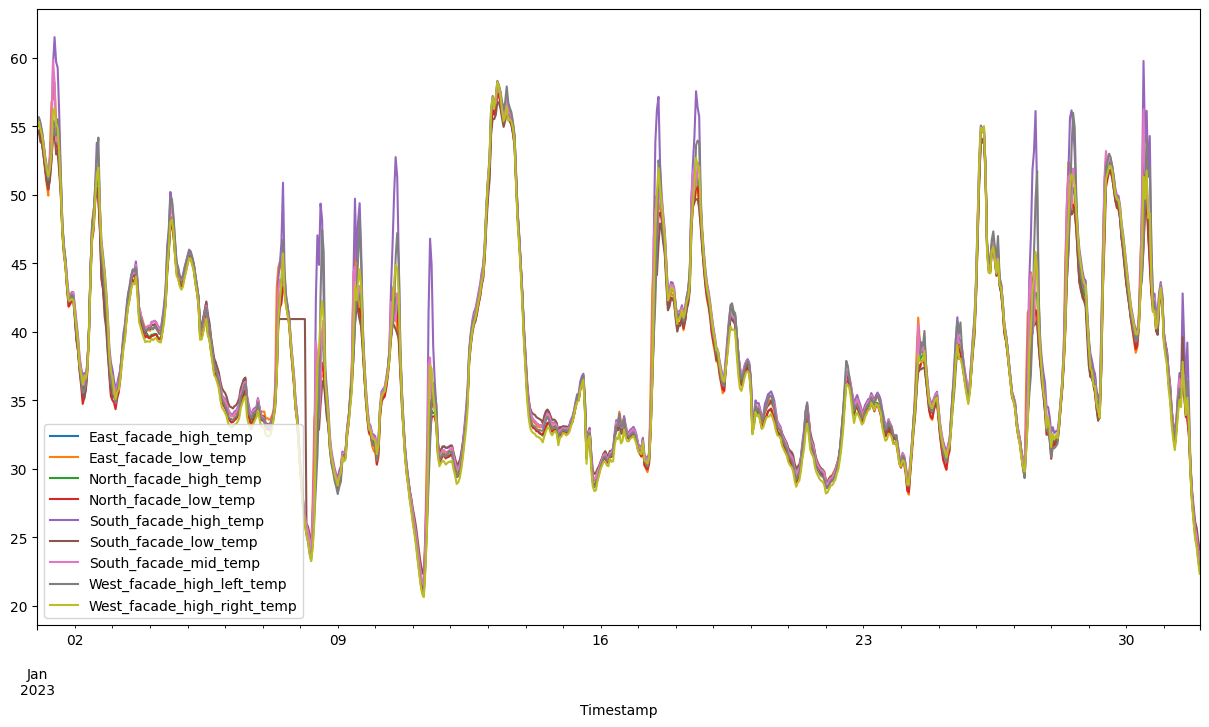

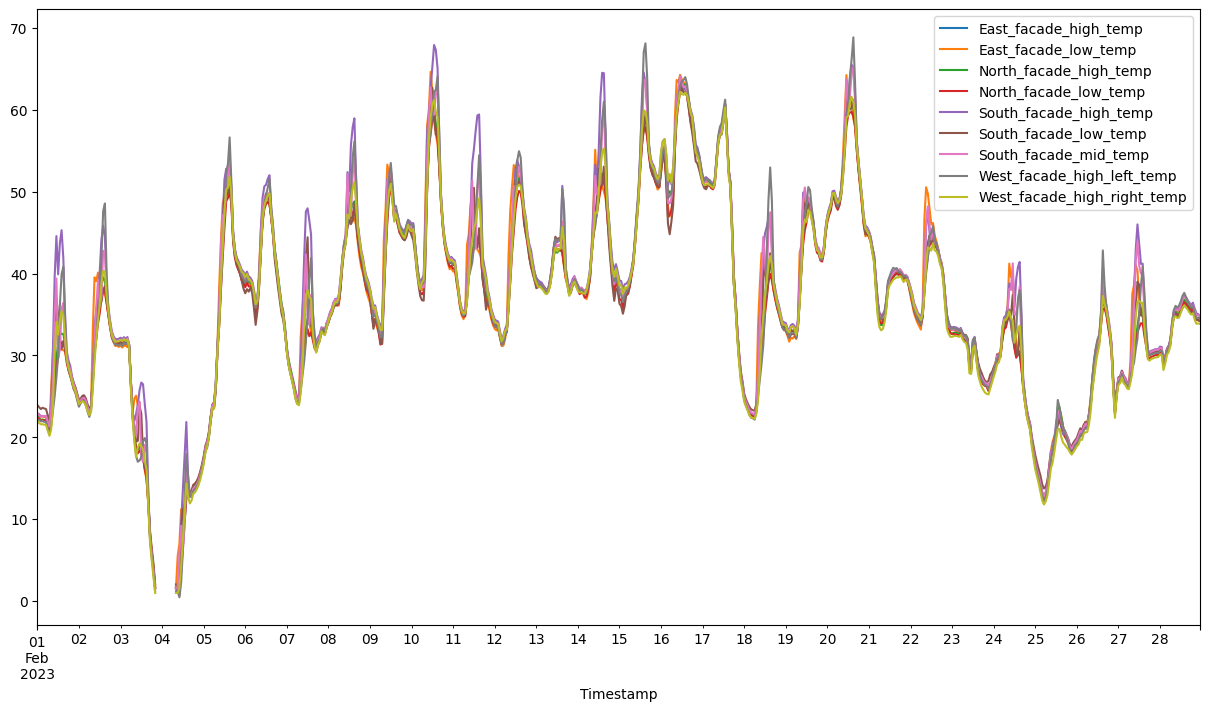

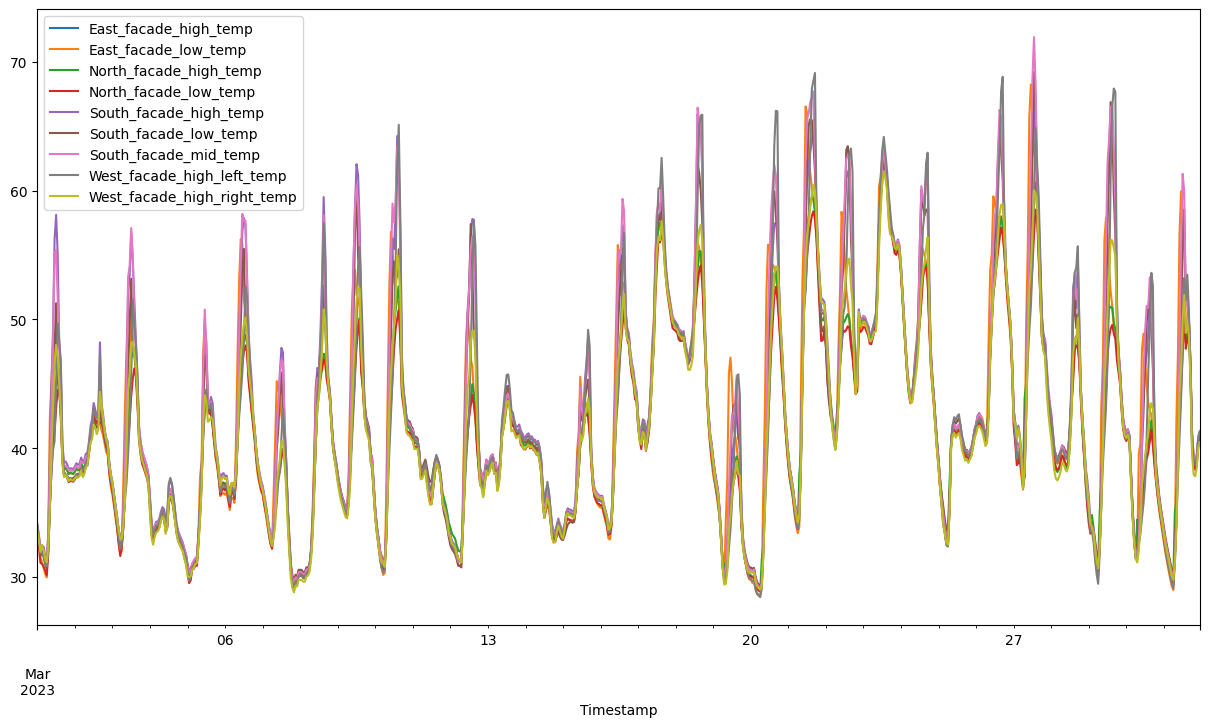

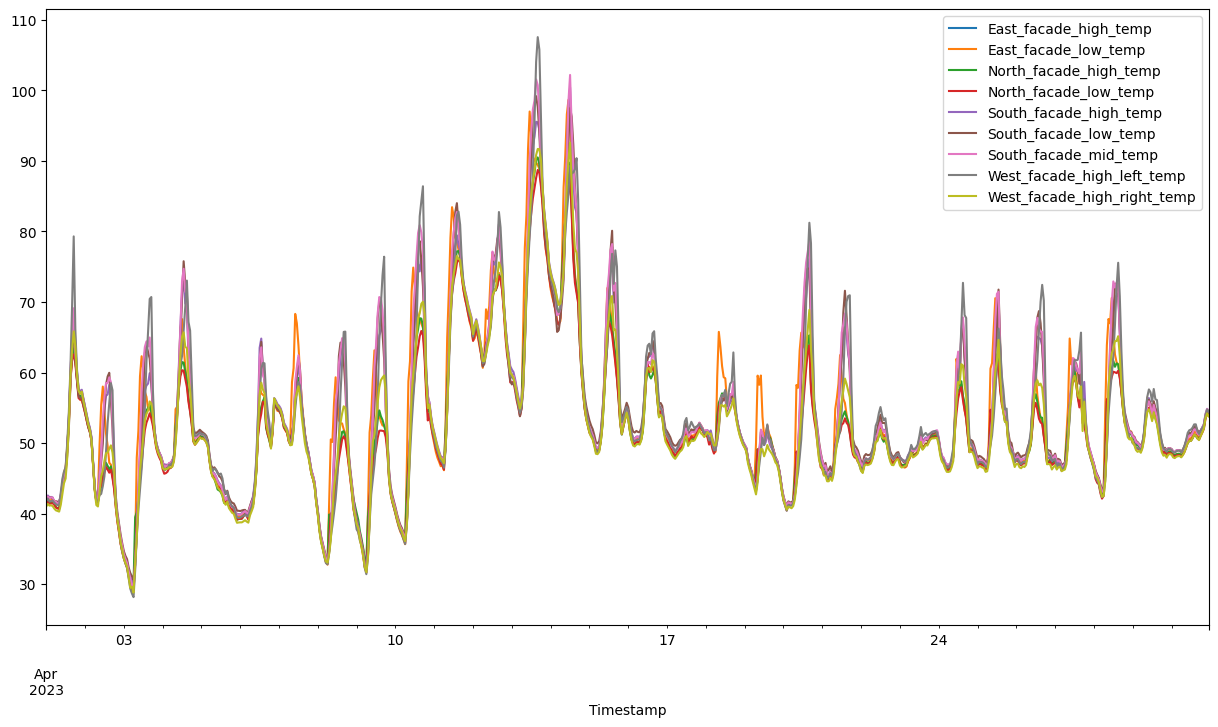

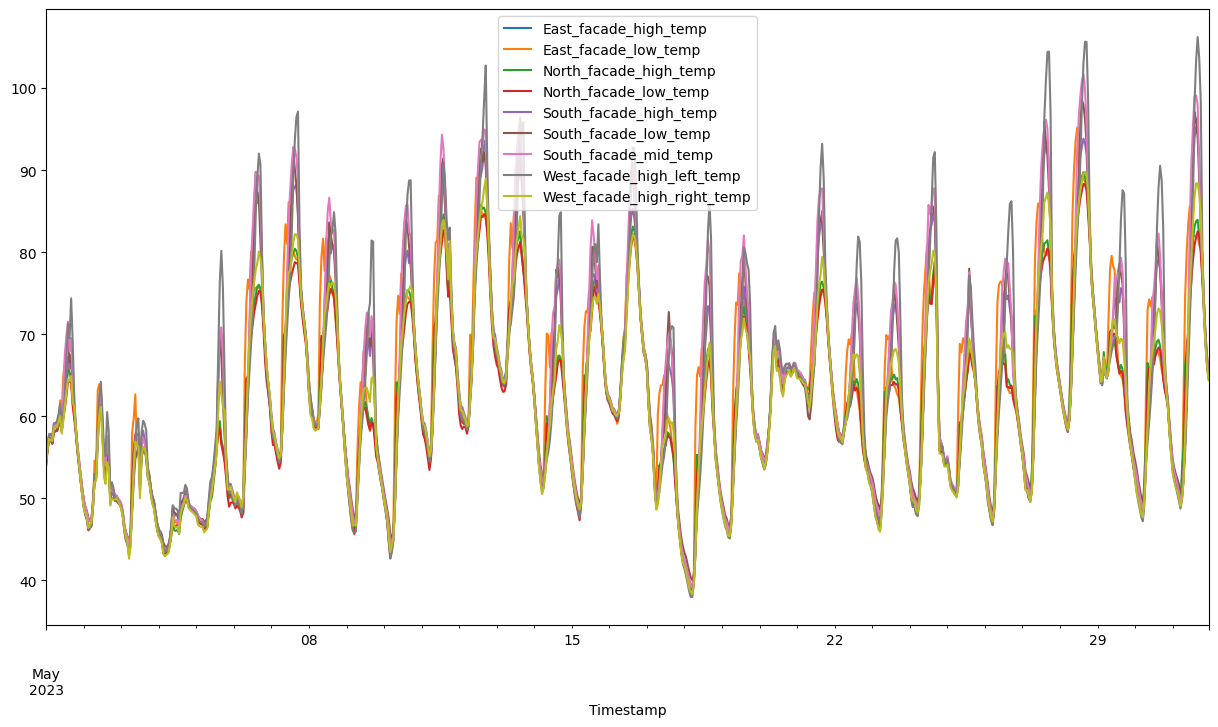

In [43]:
# Then, group by year and week number and apply Mahalanobis distance function
for (year, month), group in Zone_Temp.groupby([Zone_Temp.index.year, Zone_Temp.index.month]):

    group.plot(figsize=(15, 8))

In [44]:
def find_nan_sequences(series):
    is_nan = series.isna()
    if is_nan.any():
        start = end = None
        for i, val in enumerate(is_nan):
            if val and start is None:
                start = i
            elif not val and start is not None:
                end = i - 1
                yield (series.index[start], series.index[end])
                start = end = None
        if start is not None:
            yield (series.index[start], series.index[-1])

# Find and print start and end indices of NaN sequences in each column
empDF = pd.DataFrame()
LstN = []
LstS = []
LstE = []

for column in Zone_Temp.columns:
    for start, end in find_nan_sequences(Zone_Temp[column]):
        print(f"Missing period:'{column}' from {start} to {end}")
        LstN.append(column)
        LstS.append(start)
        LstE.append(end)
        
empDF["names"] = LstN
empDF["start"] = LstS
empDF["end"] = LstE

Missing period:'East_facade_high_temp' from 2022-07-19 16:00:00-04:00 to 2022-07-21 07:00:00-04:00
Missing period:'East_facade_high_temp' from 2022-08-19 22:00:00-04:00 to 2022-08-22 12:00:00-04:00
Missing period:'East_facade_high_temp' from 2022-12-16 03:00:00-05:00 to 2023-05-31 23:00:00-04:00
Missing period:'East_facade_low_temp' from 2022-07-19 16:00:00-04:00 to 2022-07-21 07:00:00-04:00
Missing period:'East_facade_low_temp' from 2022-08-19 22:00:00-04:00 to 2022-08-22 12:00:00-04:00
Missing period:'East_facade_low_temp' from 2023-02-03 21:00:00-05:00 to 2023-02-04 07:00:00-05:00
Missing period:'North_facade_high_temp' from 2022-07-19 16:00:00-04:00 to 2022-07-21 07:00:00-04:00
Missing period:'North_facade_high_temp' from 2022-08-19 22:00:00-04:00 to 2022-08-22 12:00:00-04:00
Missing period:'North_facade_high_temp' from 2023-02-03 21:00:00-05:00 to 2023-02-04 07:00:00-05:00
Missing period:'North_facade_low_temp' from 2022-07-19 16:00:00-04:00 to 2022-07-21 07:00:00-04:00
Missing pe

In [45]:
empDF.to_csv(r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Missing Intervals\Year3\Missing_periods_FT_Year3.csv', index=False)

In [46]:
Zone_Temp.to_csv(r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Year3\Zone_FT_Year3.csv', index=True)